In [1812]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1813]:
#load data in dataframe
df = pd.read_excel("Data_Dictionary.xlsx")

In [1814]:
df.head()

LoanStatNew  \
0        acc_now_delinq   
1  acc_open_past_24mths   
2            addr_state   
3              all_util   
4            annual_inc   

                                                                     Description  
0                The number of accounts on which the borrower is now delinquent.  
1                                     Number of trades opened in past 24 months.  
2                     The state provided by the borrower in the loan application  
3                                          Balance to credit limit on all trades  
4  The self-reported annual income provided by the borrower during registration.

In [1815]:
loandf = pd.read_csv("loan.csv")

C:\Users\amit.kumar\AppData\Local\Temp\ipykernel_16020\883669160.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loandf = pd.read_csv("loan.csv")


In [1816]:
# Read the CSV file with low_memory set to False
loandf = pd.read_csv("loan.csv", low_memory=False)

In [1817]:
loandf.shape

(39717, 111)

In [1818]:
loandf.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## Data Cleaning

In [1820]:
def get_nan_columns_sorted(df):
    # Count NaN values for each column
    nan_count = df.isnull().sum()
    # Filter columns where NaN count is greater than 0
    nan_columns_sorted = nan_count[nan_count > 0].sort_values(ascending=False)
    return nan_columns_sorted

In [1821]:
get_nan_columns_sorted(loandf)

bc_open_to_buy                    39717
acc_open_past_24mths              39717
bc_util                           39717
mo_sin_old_il_acct                39717
mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717


In [1822]:
pd.set_option('display.max_rows', None)

In [1823]:
# Drop columns where all values are NaN
loandf_cleaned = loandf.dropna(axis=1, how='all')

In [1824]:
loandf_cleaned.shape

(39717, 57)

In [1825]:
# Get columns where the number of unique values is 1
single_value_cols = loandf_cleaned.columns[loandf_cleaned.nunique() == 1].tolist()

In [1826]:
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [1827]:
# Drop these columns from the DataFrame as these will not contribute to analysis
loandf_cleaned = loandf_cleaned.drop(columns=single_value_cols)

In [1828]:
loandf_cleaned.shape

(39717, 48)

In [1829]:
get_nan_columns_sorted(loandf_cleaned).head(2)

next_pymnt_d              38577
mths_since_last_record    36931
dtype: int64

In [1830]:
loandf_cleaned[["next_pymnt_d","loan_status"]].head()

next_pymnt_d  loan_status
0          NaN   Fully Paid
1          NaN  Charged Off
2          NaN   Fully Paid
3          NaN   Fully Paid
4       Jun-16      Current

In [1831]:
# Leaving NaN as is for next_paymnt_d as it actually means "No Payment due", cocedering the loan_status column
# Find rows where next_pymnt_d is NaN and loan_status is 'Current'
missing_next_pymnt_rows = loandf_cleaned[(loandf_cleaned['next_pymnt_d'].isnull()) & (loandf_cleaned['loan_status'] == 'Current')]
missing_next_pymnt_rows.shape

(0, 48)

In [1832]:
# Find rows where next_pymnt_d is not NaN and loan_status is not 'Current'
non_current_with_payment_due = loandf_cleaned[(loandf_cleaned['next_pymnt_d'].notnull()) & (loandf_cleaned['loan_status'] != 'Current')]
non_current_with_payment_due.shape

(0, 48)

In [1833]:
# It is clear that next_pymnt_d is realted to loan_status. 
# Data value is only for loan_status = Current
# Hence it is safe to drop the column as the information is there in loan status column
loandf_cleaned = loandf_cleaned.drop(columns=["next_pymnt_d"])

In [1834]:
get_nan_columns_sorted(loandf_cleaned).head(2)

mths_since_last_record    36931
mths_since_last_delinq    25682
dtype: int64

In [1835]:
#handling mths_since_last_record fiield
loandf_cleaned[["mths_since_last_record","loan_status"]].head()

mths_since_last_record  loan_status
0                     NaN   Fully Paid
1                     NaN  Charged Off
2                     NaN   Fully Paid
3                     NaN   Fully Paid
4                     NaN      Current

In [1836]:
# view full test in dis=ctionary
pd.set_option('display.max_colwidth', None)

In [1837]:
loandf_cleaned.mths_since_last_record.value_counts()

mths_since_last_record
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
94.0      55
108.0     55
93.0      54
87.0      54
100.0     53
106.0     53
88.0      53
110.0     53
109.0     52
96.0      51
86.0      51
97.0      51
114.0     51
99.0      50
101.0     50
90.0      49
103.0     49
107.0     48
85.0      47
117.0     47
91.0      44
92.0      44
102.0     43
98.0      42
116.0     41
95.0      40
105.0     40
112.0     39
115.0     37
118.0     36
63.0      15
76.0      15
61.0      14
58.0      13
80.0      12
67.0      11
81.0      11
69.0      11
55.0      11
119.0     10
54.0      10
77.0      10
73.0       9
53.0       9
64.0       9
72.0       9
50.0       9
82.0       8
21.0       8
70.0       8
78.0       7
49.0       7
57.0       7
43.0       7
79.0       7
44.0       7
38.0       7
26.0       6
40.0       6
41.0       6
29.0       6
65.0       6
33.0       6
23.0       6
75.0       6
42.0       6
60.0       6
74.0       6
66.0       6
62.0       6
45

In [1838]:
# Create a new column 'has_public_record' where 'mths_since_last_record' is NaN => 'No', else 'Yes'
loandf_cleaned.loc[:, 'has_public_record'] = np.where(loandf_cleaned['mths_since_last_record'].isnull(), 'No', 'Yes')

In [1839]:
loandf_cleaned.has_public_record.value_counts()

has_public_record
No     36931
Yes     2786
Name: count, dtype: int64

In [1840]:
# Dropping the mths_since_last_record column
loandf_cleaned = loandf_cleaned.drop(columns=["mths_since_last_record"])

In [1841]:
#handling mths_since_last_delinq column
# mths_since_last_delinq has 64.6% null values. But NaN value maeans the accounts have never been delinquent
# Create a new column has_delinquency with Yes and No values
loandf_cleaned.loc[:,'has_delinquency'] = np.where(loandf_cleaned['mths_since_last_delinq'].isnull(), 'No', 'Yes')

In [1842]:
loandf_cleaned.has_delinquency.value_counts()

has_delinquency
No     25682
Yes    14035
Name: count, dtype: int64

In [1843]:
# Dropping the mths_since_last_record column
loandf_cleaned = loandf_cleaned.drop(columns=["mths_since_last_delinq"])

In [1844]:
loandf_cleaned.desc.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [1845]:
#handling desc column. It is difficult to make any sense of text at this point.
#create a new column has_desc
loandf_cleaned.loc[:,'has_desc'] = np.where(loandf_cleaned['desc'].isnull(), 'No', 'Yes')

In [1846]:
loandf_cleaned.has_desc.value_counts()

has_desc
Yes    26775
No     12942
Name: count, dtype: int64

In [1847]:
#dropping desc column
loandf_cleaned = loandf_cleaned.drop(columns=['desc'])

In [1848]:
loandf_cleaned.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [1849]:
# handling emp_title column
# about 6% is null. This can be either rhe borrower was unemployed or simply did not provide details
# Setting the null values with "Unknown"
loandf_cleaned.loc[:,'emp_title'] = loandf_cleaned['emp_title'].fillna('Unknown')

In [1850]:
loandf_cleaned.emp_title.value_counts()

emp_title
Unknown                                                                           2459
US Army                                                                            134
Bank of America                                                                    109
IBM                                                                                 66
AT&T                                                                                59
Kaiser Permanente                                                                   56
USAF                                                                                54
Wells Fargo                                                                         54
UPS                                                                                 53
US Air Force                                                                        52
Walmart                                                                             45
Lockheed Martin                  

In [1851]:
loandf_cleaned.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [1852]:
#handle emp_length
# this indicates job stability. Missing values may indicate borrower being unemployed or simple not provided.
# hence replacing nulls with Unknown seems a good approach
loandf_cleaned.loc[:,'emp_length'] = loandf_cleaned['emp_length'].fillna('Unknown')

In [1853]:
loandf_cleaned.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Unknown      1075
Name: count, dtype: int64

In [1854]:
loandf_cleaned.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [1855]:
# Handling pub_rec_bankruptcies
# This column has 1.75 missing values
# It is very likely that missing values is because the borrowers have no bankrupcies as any bankrupcies is likely to be discovered by loan provider
# Hence fillling with 0.0 (which is also median) seems a reasonable approach here
loandf_cleaned.loc[:, 'pub_rec_bankruptcies'] = loandf_cleaned['pub_rec_bankruptcies'].fillna(0.0)

In [1856]:
loandf_cleaned.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [1857]:
# Handling last_pymnt_d
# Relative small .18% is missing
# No clear reason can be attributed
# In order to avoid any bias, dropping the rows seems reasonable
loandf_cleaned = loandf_cleaned.dropna(subset=['last_pymnt_d'])

In [1858]:
loandf_cleaned.shape

(39646, 47)

In [1859]:
loandf_cleaned.revol_util.value_counts()

revol_util
0%        975
0.20%      62
63%        62
0.10%      58
40.70%     58
66.70%     58
66.60%     57
61%        57
46.40%     57
31.20%     57
65.90%     56
70.40%     56
57.40%     55
37.60%     55
64.80%     55
49.80%     55
25.50%     55
48.90%     54
89.50%     54
78.70%     54
46.60%     54
51.60%     54
32%        54
68.60%     54
75.50%     54
27.20%     54
64.60%     54
76.60%     54
33.70%     53
68.70%     53
41%        53
54.30%     53
62.80%     53
35.30%     53
70.80%     53
47.80%     53
34.40%     53
55.80%     53
45.60%     53
48.20%     53
51.10%     53
72.10%     52
53.90%     52
55.50%     52
36.50%     52
70.10%     52
51.50%     52
66.90%     52
74.90%     52
48%        52
70.30%     52
41.60%     52
88%        51
29.10%     51
54.10%     51
58.70%     51
43.40%     51
54.60%     51
55.10%     51
35.70%     51
89.90%     51
30.90%     51
41.40%     51
40.20%     51
45.90%     51
66.10%     51
47.40%     50
52.30%     50
53.70%     50
23.70%     50
73.20%   

In [1860]:
# Handling revol_util
# Relativelly low .13 % null values
# As there is not clear memaning of null values, it seems best to drop the rows with null values
loandf_cleaned = loandf_cleaned.dropna(subset=['revol_util'])

In [1861]:
# Remove '%' and convert 'revol_util' to float
loandf_cleaned.loc[:, 'revol_util'] = loandf_cleaned['revol_util'].str.rstrip('%').astype('float') / 100

In [1862]:
loandf_cleaned.shape

(39600, 47)

In [1863]:
get_nan_columns_sorted(loandf_cleaned).head(2)

title                 11
last_credit_pull_d     2
dtype: int64

In [1864]:
# Handling title
# title has only 11 null values
# Introducing a new category "Unknown" seeps appropriate
loandf_cleaned.loc[:, 'title'] = loandf_cleaned['title'].fillna('Unknown')

In [1865]:
# Handling last_credit_pull_d
# Since there are only 2 null values, it is safe to drop there rows without any impact on EDA
# however this column is not expected to impact target valrable, hence dropping this column
loandf_cleaned = loandf_cleaned.drop(columns=['last_credit_pull_d'])

In [1866]:
#Handling earliest_cr_line
# Convert 'earliest_cr_line' to datetime format
from datetime import datetime
loandf_cleaned['earliest_cr_line'] = pd.to_datetime(loandf_cleaned['earliest_cr_line'], format='%b-%y')

# Calculate the difference in years (credit age)
current_date = datetime.now()
loandf_cleaned['credit_line_age'] = (current_date - loandf_cleaned['earliest_cr_line']).dt.days // 365

# Drop the original 'earliest_cr_line' if needed
loandf_cleaned = loandf_cleaned.drop(columns=['earliest_cr_line'])
# Now 'credit_line_age' is a numerical feature representing the borrower's credit history length.

In [1867]:
loandf_cleaned['credit_line_age'].value_counts()

credit_line_age
 24    3245
 25    3074
 26    2755
 23    2704
 27    2369
 28    2241
 29    2071
 22    1988
 30    1949
 21    1826
 20    1813
 19    1538
 31    1377
 18    1235
 32    1017
 33    1002
 34     993
 35     830
 17     794
 36     724
 37     573
 38     494
 39     468
 40     394
 41     318
 16     230
 42     210
 43     180
 45     169
 44     168
 46     167
 47     112
 48      89
 49      83
 50      68
 51      61
 54      50
 53      50
 52      48
 55      31
-44      20
-43      20
-40      10
-39      10
-42       8
-41       7
-38       6
-45       3
 15       2
-35       1
-32       1
-22       1
-27       1
-30       1
-31       1
Name: count, dtype: int64

In [1868]:
#-ve values is due to incorrect century. To fix this we can add 76 to rows with -ve values
loandf_cleaned['credit_line_age'] = loandf_cleaned['credit_line_age'].apply(lambda x: x + 76 if x < 0 else x)

In [1869]:
#handling last_pymnt_d. This column is not expected to contribute to analysis, hence can be dropped
loandf_cleaned = loandf_cleaned.drop(columns=["last_pymnt_d"])

In [1870]:
# Handling issue_d": It will be intresting to see trend on issue_month, instead of issue date
# Step 1: Convert 'issue_d' to datetime format
loandf_cleaned['issue_d'] = pd.to_datetime(loandf_cleaned['issue_d'], format='%b-%y')

# Step 2: Extract month and create a new column (optional)
loandf_cleaned['issue_month'] = loandf_cleaned['issue_d'].dt.month  # Month as an integer (1-12)
loandf_cleaned['issue_year'] = loandf_cleaned['issue_d'].dt.year  # Month as an integer (1-12)
# Step 3: Drop the original 'issue_d' column
loandf_cleaned = loandf_cleaned.drop(columns=['issue_d'])

In [1871]:
# url = https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 is also does not seem to have any contribution to EDA
loandf_cleaned = loandf_cleaned.drop(columns=["url"])
#dropping id and member_id colums as there will not be analysed
loandf_cleaned = loandf_cleaned.drop(columns=["id", "member_id"])

In [1872]:
loandf_cleaned.shape

(39600, 43)

In [1873]:
# Clean the 'int_rate' column
loandf_cleaned.loc[:, 'int_rate'] = loandf_cleaned['int_rate'].str.rstrip('%').astype('float') / 100

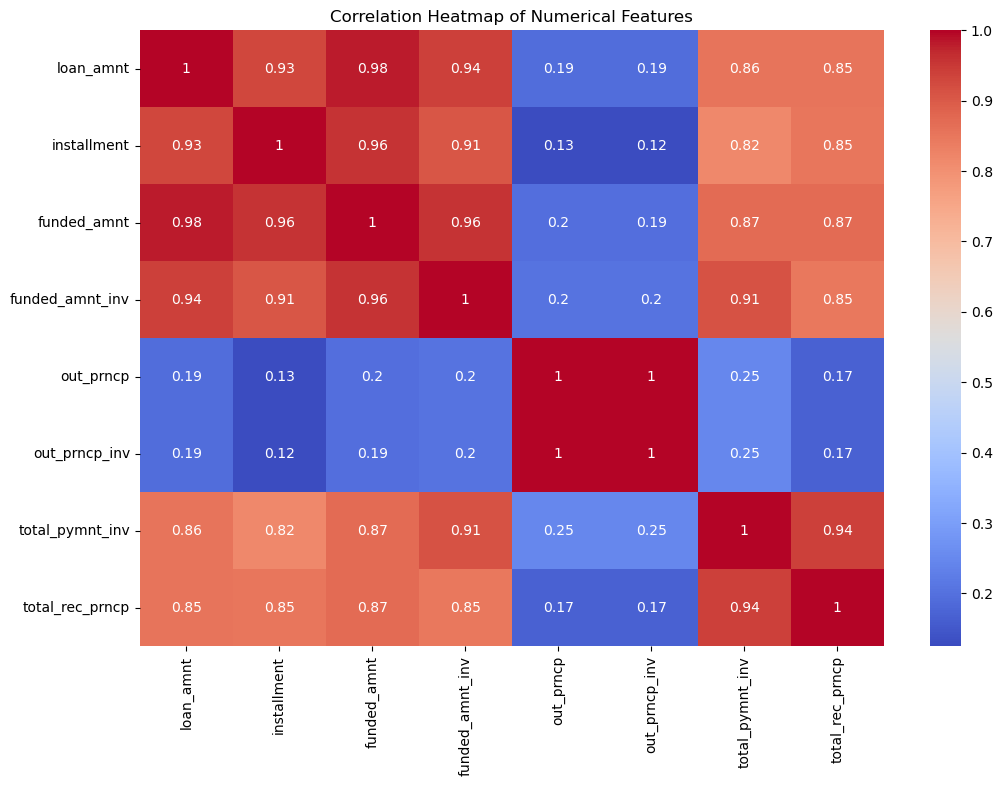

In [1935]:
#Finding highly co related columns
corelated_cols = ["loan_amnt","installment","funded_amnt", "funded_amnt_inv", "out_prncp", "out_prncp_inv", "total_pymnt_inv", "total_rec_prncp"]
corr = loandf_cleaned[corelated_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [1937]:
#loan_amnt: drop funded_amnt, funded_amnt_inv
# out_pnrcp: drop out_prncp_inv
# total_pymnt: drop total_pymnt_inv, total_rec_prncp
cols_to_remove = ["installment","funded_amnt", "funded_amnt_inv", "out_prncp_inv", "total_pymnt_inv", "total_rec_prncp"]

# Using list comprehension to filter out the columns
num_cols = [col for col in num_cols if col not in cols_to_remove]
loandf_cleaned = loandf_cleaned.drop(columns=cols_to_remove)

In [ ]:
# Derived metrics
#Debt-to-Loan Ratio: dti / loan_amnt.
loandf_cleaned["debt_to_loan_ratio"] = loandf_cleaned["dti"] / loandf_cleaned["loan_amnt"]
#Utilization Ratio: revol_bal / total_acc for revolving credit.
loandf_cleaned["utilization_ratio"] = loandf_cleaned["revol_bal"] / loandf_cleaned["total_acc"]
#Income-to-Loan Ratio: annual_inc / loan_amnt.
loandf_cleaned["income-to-loan_ratio"] = loandf_cleaned["annual_inc"] / loandf_cleaned["loan_amnt"]

derived_cols = ["debt_to_loan_ratio", "utilization_ratio", "income-to-loan_ratio"]
loandf_cleaned["debt_to_loan_ratio"].describe()

In [1942]:
def calculate_thresholds(col):
    return {
        'Very Low': col.quantile(0.25),   # 25th percentile
        'Low': col.quantile(0.50),        # 50th percentile (median)
        'Medium': col.quantile(0.75),     # 75th percentile
        'High': col.quantile(0.95)        # 95th percentile
    }


# Function to categorize based on the thresholds
def categorize(value, thresholds):
    if value <= thresholds['Very Low']:
        return 'Very Low'
    elif value <= thresholds['Low']:
        return 'Low'
    elif value <= thresholds['Medium']:
        return 'Medium'
    elif value <= thresholds['High']:
        return 'High'
    else:
        return 'Very High'

In [1943]:
# Apply the function to categorize the annual income
thresholds = calculate_thresholds(loandf_cleaned['annual_inc'])
loandf_cleaned['income_category'] = loandf_cleaned['annual_inc'].apply(lambda x: categorize(x, thresholds))
loandf_cleaned = loandf_cleaned.drop(columns=["annual_inc"])

In [1944]:
# Categorise revol_bal in similar way
loandf_cleaned['revol_bal'].describe()

count     39600.000000
mean      13408.853005
std       15894.529558
min           0.000000
25%        3722.750000
50%        8868.000000
75%       17085.250000
max      149588.000000
Name: revol_bal, dtype: float64

In [1945]:
thresholds = calculate_thresholds(loandf_cleaned['revol_bal'])
loandf_cleaned['revol_bal_category'] = loandf_cleaned['revol_bal'].apply(lambda x: categorize(x, thresholds))
loandf_cleaned = loandf_cleaned.drop(columns=["revol_bal"])

In [1946]:
loandf_cleaned['out_prncp'].describe()

count    39600.000000
mean        51.379242
std        375.716328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

In [1947]:
# Log-transform the out_prncp column, adding 1 to avoid log(0)
loandf_cleaned['log_out_prncp'] = np.log1p(loandf_cleaned['out_prncp'])
loandf_cleaned = loandf_cleaned.drop(columns=["out_prncp"])

In [1948]:
loandf_cleaned["total_pymnt"].describe()

count    39600.000000
mean     12182.849214
std       9037.478942
min         33.730000
25%       5597.812391
50%       9938.472576
75%      16565.400122
max      58563.679930
Name: total_pymnt, dtype: float64

In [1949]:
# Log-transform the total_pymnt column
loandf_cleaned['log_total_pymnt'] = np.log1p(loandf_cleaned['total_pymnt'])
loandf_cleaned = loandf_cleaned.drop(columns=["total_pymnt"])
loandf_cleaned["log_total_pymnt"].describe()

count    39600.000000
mean         9.109194
std          0.845613
min          3.547604
25%          8.630310
50%          9.204269
75%          9.715132
max         10.977887
Name: log_total_pymnt, dtype: float64

In [1950]:
# Log-transform the total_pymnt column
loandf_cleaned['log_total_rec_int'] = np.log1p(loandf_cleaned['total_rec_int'])
loandf_cleaned = loandf_cleaned.drop(columns=["total_rec_int"])
loandf_cleaned["log_total_rec_int"].describe()

count    39600.000000
mean         7.179024
std          1.118666
min          1.976855
25%          6.502711
50%          7.211328
75%          7.952108
max         10.067504
Name: log_total_rec_int, dtype: float64

In [1951]:
# Log-transform the total_pymnt column
loandf_cleaned['log_last_pymnt_amnt'] = np.log1p(loandf_cleaned['last_pymnt_amnt'])
loandf_cleaned = loandf_cleaned.drop(columns=["last_pymnt_amnt"])
loandf_cleaned["log_last_pymnt_amnt"].describe()

count    39600.000000
mean         6.605212
std          1.759569
min          0.000000
25%          5.398344
50%          6.309809
75%          8.105326
max         10.494497
Name: log_last_pymnt_amnt, dtype: float64

In [1952]:
bins = {
    "log_out_prncp": 50,
    "log_total_pymnt": 50,
    "log_total_rec_int": 50,
    "log_last_pymnt_amnt": 50
}

In [1953]:
loandf_cleaned.shape

(39600, 40)

In [1954]:
num_cols = []
cat_cols = []
extra_cols = []

# Loop through each column and classify based on unique values
for col in loandf_cleaned.columns:
    unique_values = loandf_cleaned[col].nunique()  # Get number of unique values in the column
    
    if unique_values > 20:
        num_cols.append(col)  # If more than 20 unique values, treat as numeric
    else:
        cat_cols.append(col)  # If 20 or fewer unique values, treat as categorical

In [1955]:
print(num_cols, "\n\n" ,cat_cols)

['loan_amnt', 'int_rate', 'sub_grade', 'emp_title', 'title', 'zip_code', 'addr_state', 'dti', 'open_acc', 'revol_util', 'total_acc', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'credit_line_age', 'debt_to_loan_ratio', 'utilization_ratio', 'income-to-loan_ratio', 'log_out_prncp', 'log_total_pymnt', 'log_total_rec_int', 'log_last_pymnt_amnt'] 

 ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'has_public_record', 'has_delinquency', 'has_desc', 'issue_month', 'issue_year', 'income_category', 'revol_bal_category']


In [1956]:
loandf_cleaned.iloc[:,30:40].head()

issue_year  debt_to_loan_ratio  utilization_ratio  income-to-loan_ratio  \
0        2011            0.005530        1516.444444              4.800000   
1        2011            0.000400         421.750000             12.000000   
2        2011            0.003633         295.600000              5.105000   
3        2011            0.002000         151.297297              4.920000   
4        2011            0.005980         731.131579             26.666667   

  income_category revol_bal_category  log_out_prncp  log_total_pymnt  \
0        Very Low             Medium       0.000000         8.676614   
1        Very Low           Very Low       0.000000         6.917418   
2        Very Low           Very Low       0.000000         8.008587   
3             Low                Low       0.000000         9.411884   
4          Medium               High       6.263513         8.164604   

   log_total_rec_int  log_last_pymnt_amnt  
0           6.761758             5.151093  
1           6.078032             4.792977  
2           6.407985             6.478371  
3           7.703423             5.881873  
4           6.945427             4.231058

In [1957]:
# sub_grade is categorical column
cat_cols_observed = ["sub_grade","emp_title", "title", "addr_state","zip_code"];
num_cols_observed = ["delinq_2yrs", "inq_last_6mths", "pub_rec", "pub_rec_bankruptcies"]
# Remove columns from num_cols that are present in cat_cols_observed
num_cols = [col for col in num_cols if col not in cat_cols_observed]
cat_cols = [col for col in cat_cols if col not in num_cols_observed]
# Append the columns from cat_cols_observed to cat_cols
cat_cols = cat_cols + cat_cols_observed
num_cols = num_cols + num_cols_observed

In [1958]:
print(loandf_cleaned.shape, len(num_cols + cat_cols))

(39600, 40) 40


### Univariate Analysis

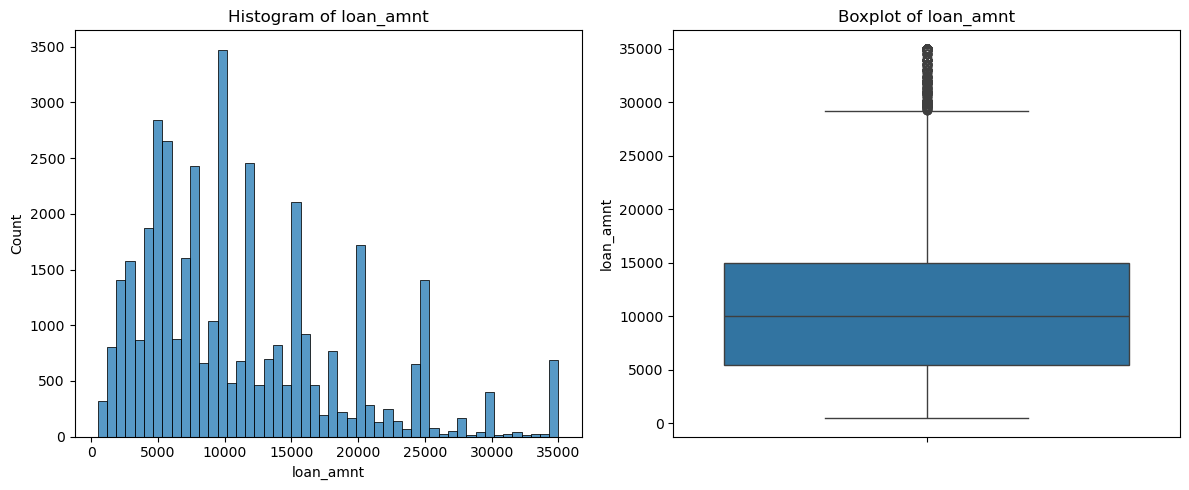

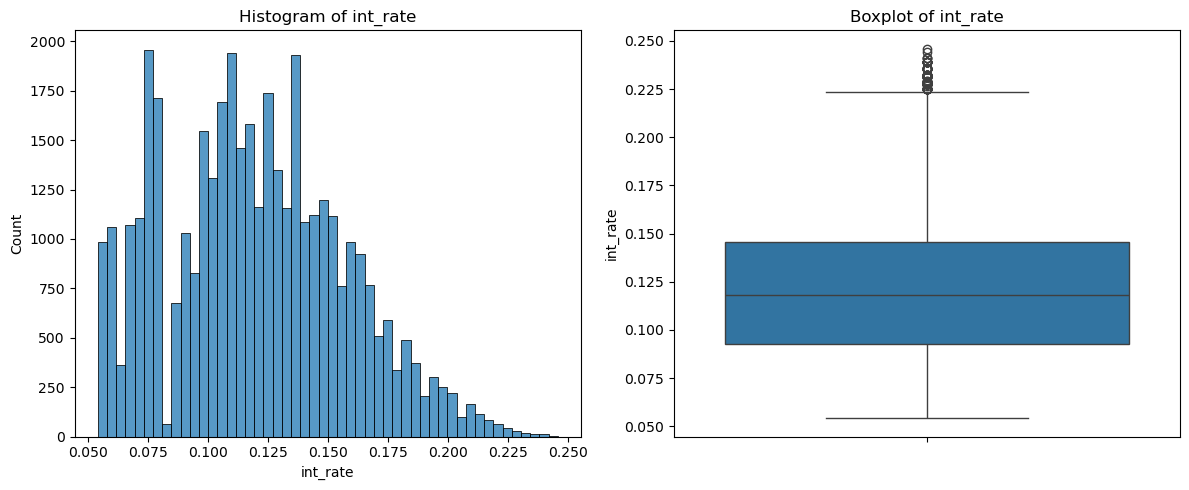

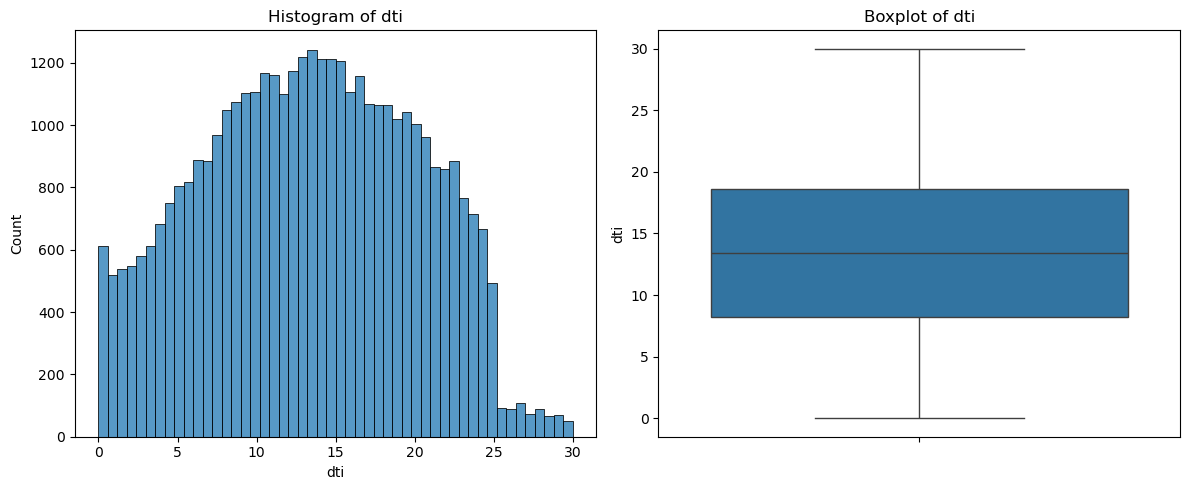

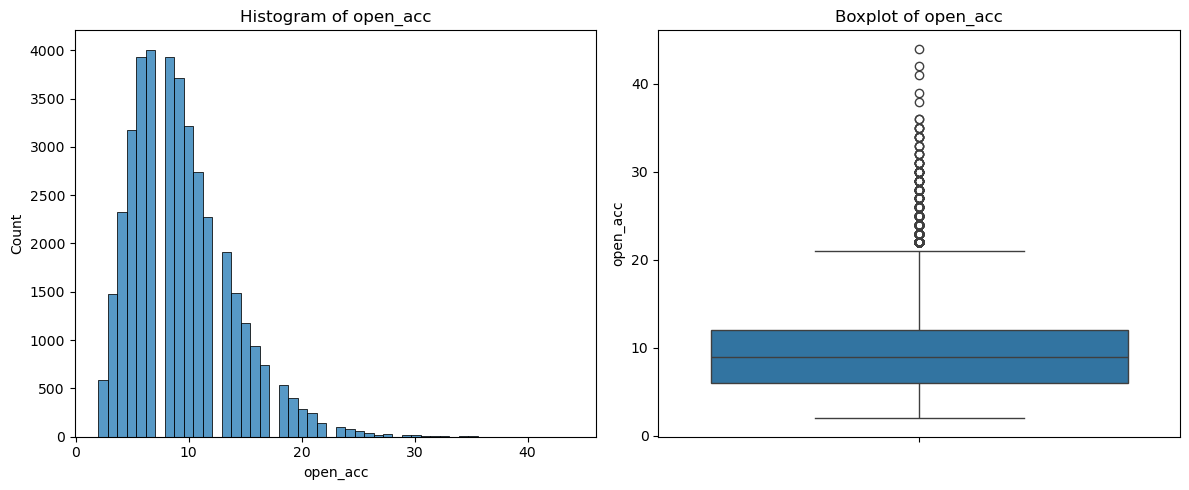

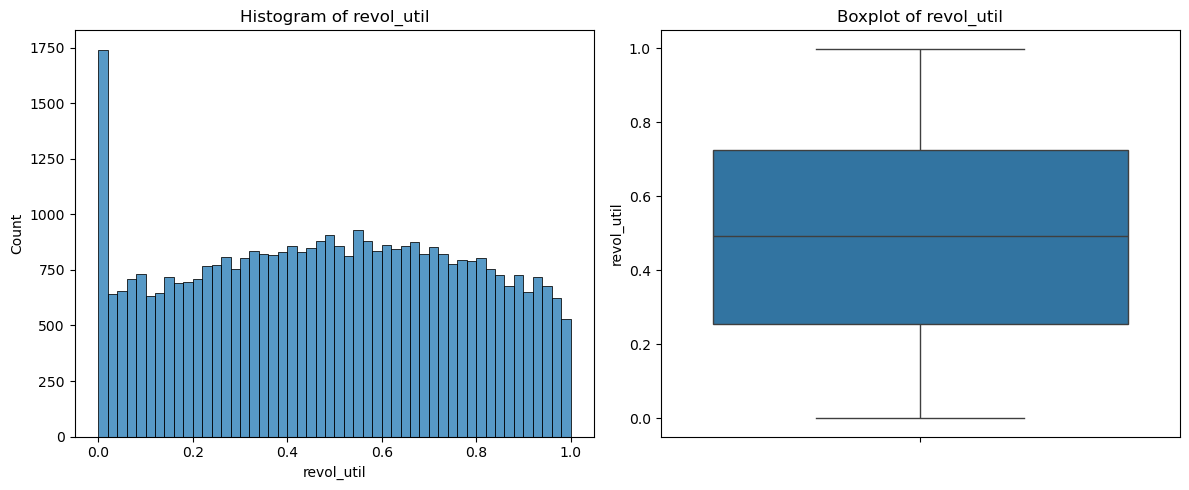

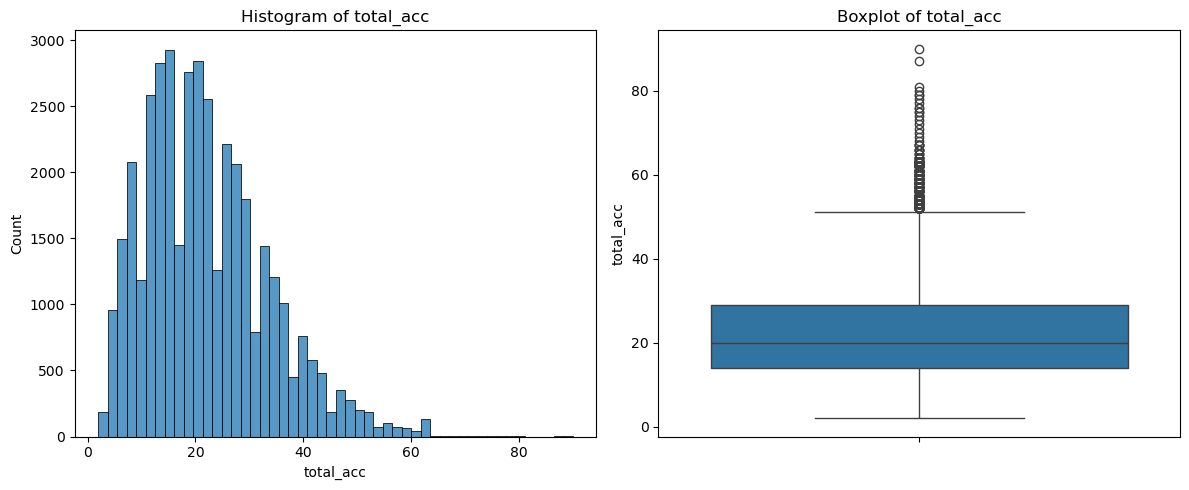

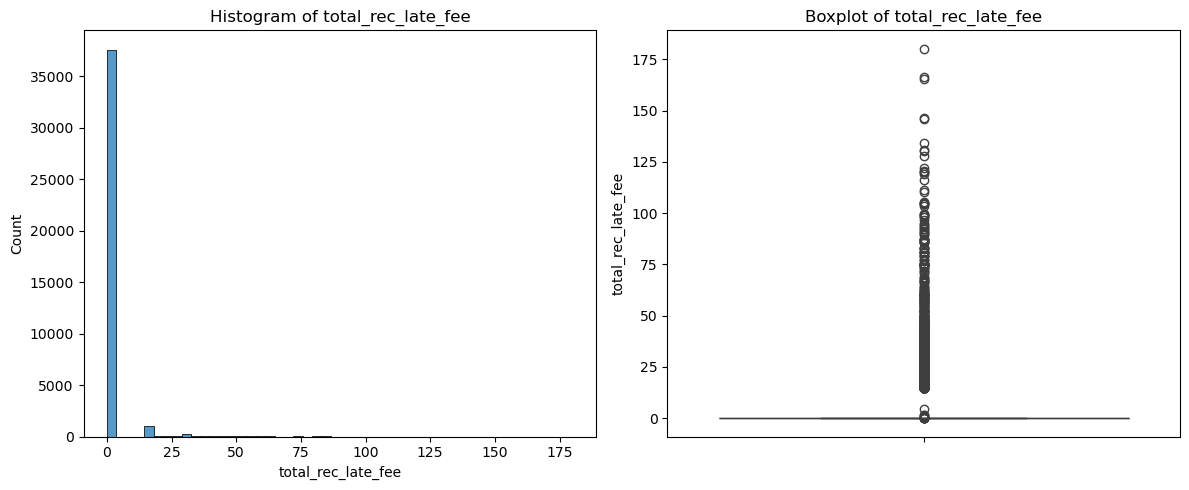

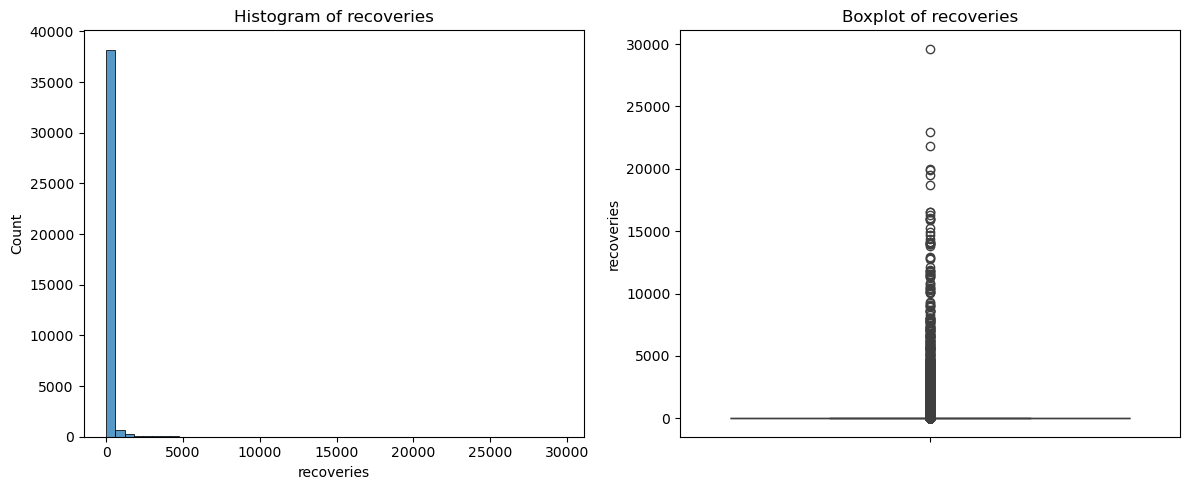

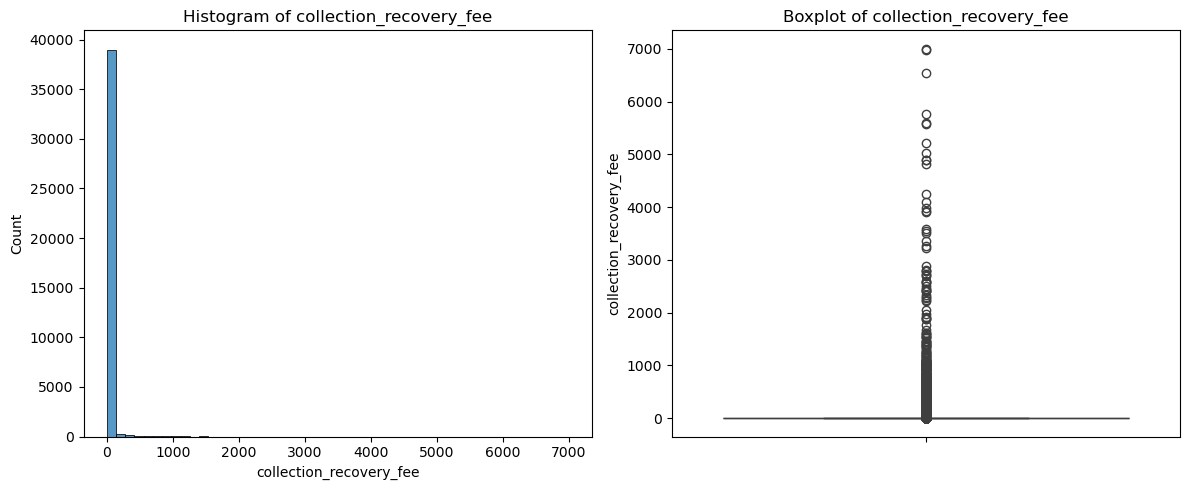

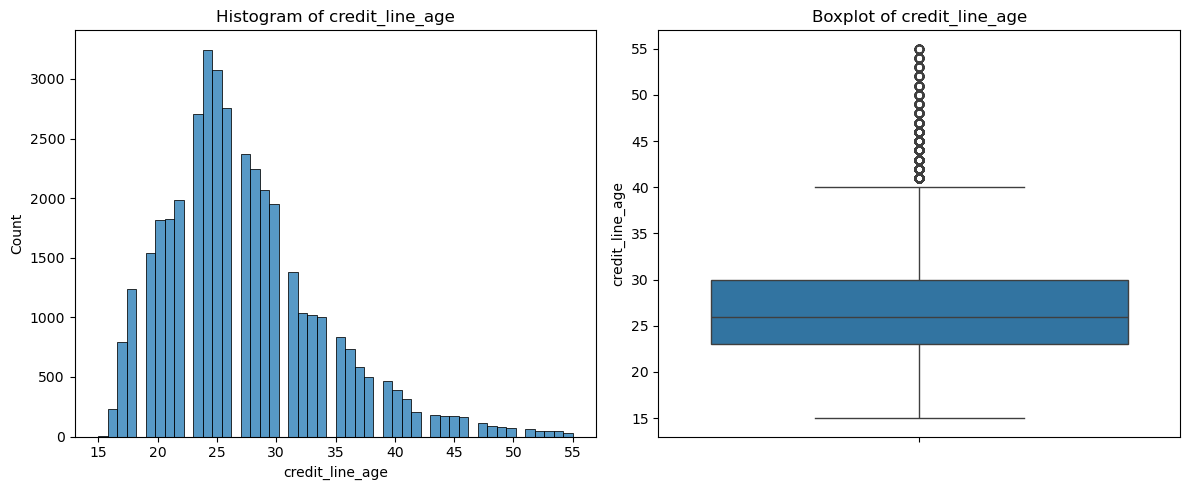

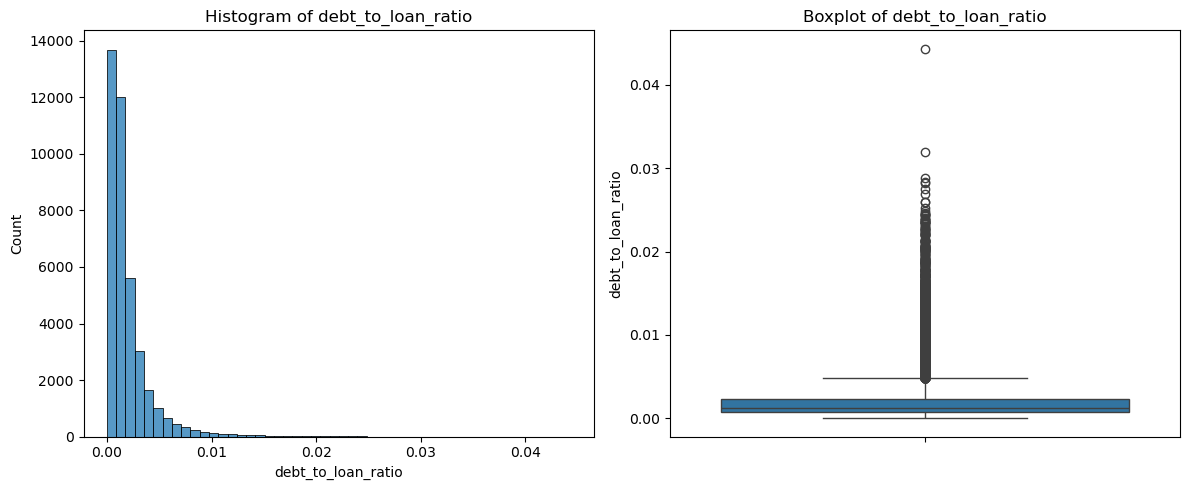

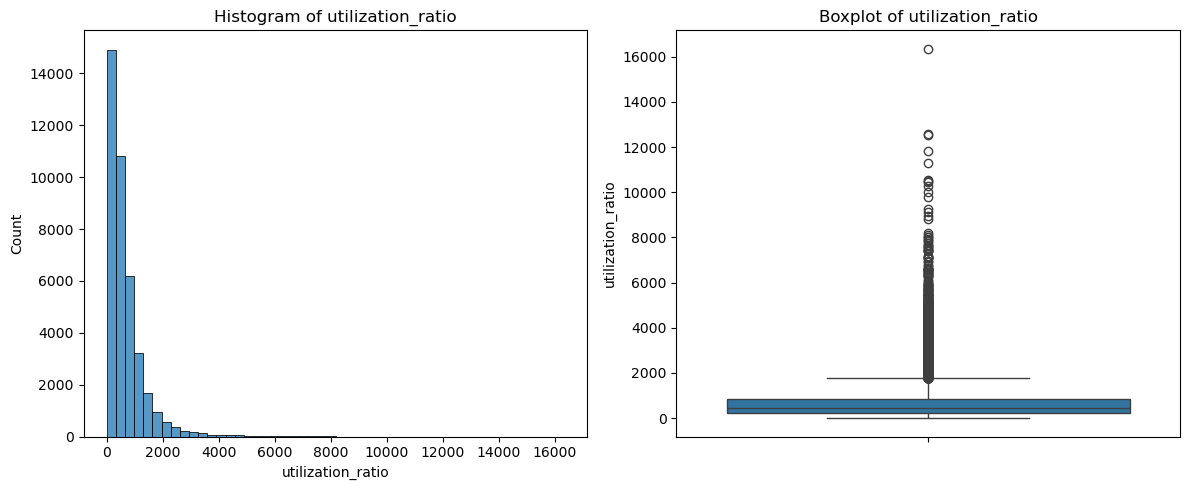

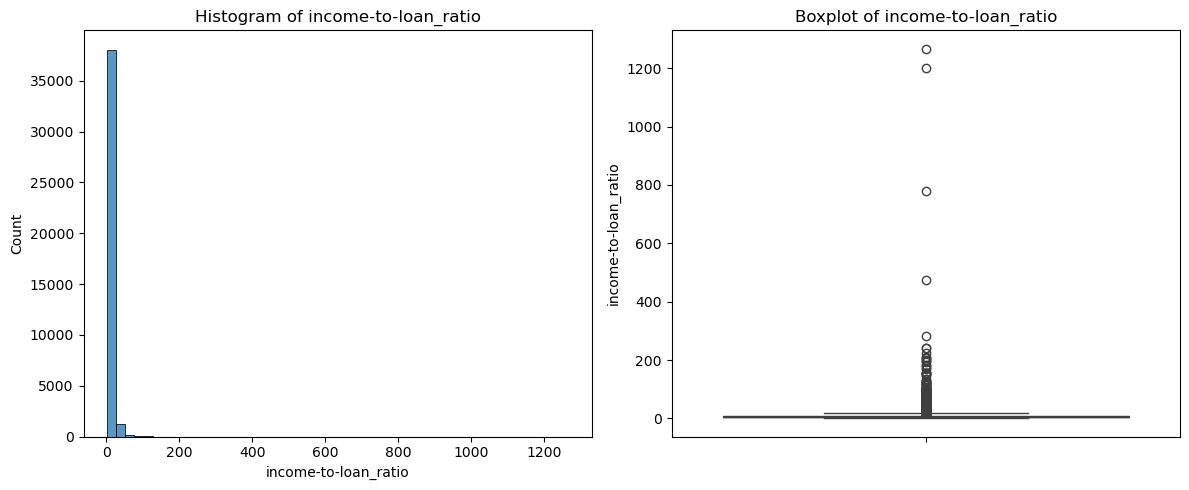

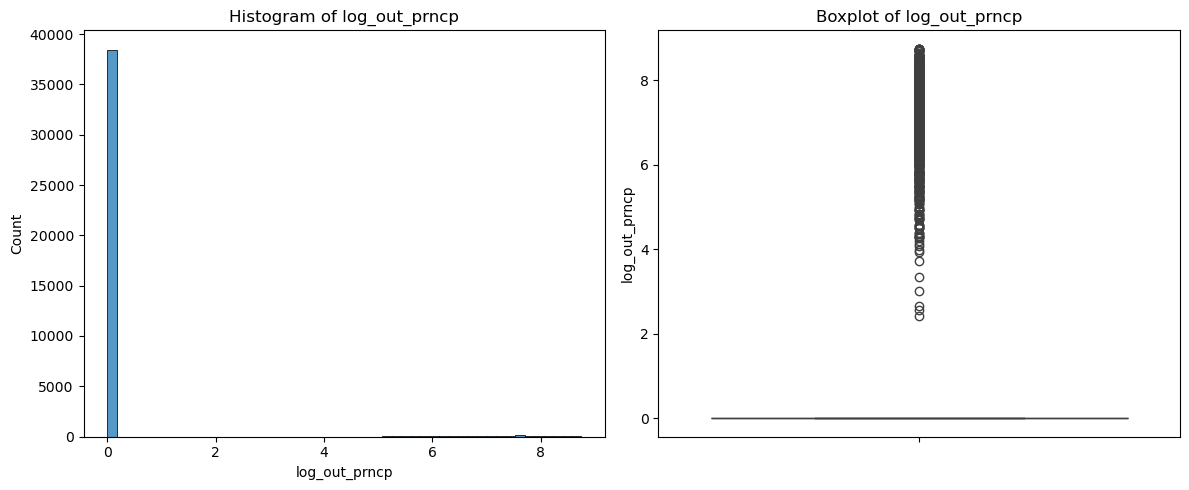

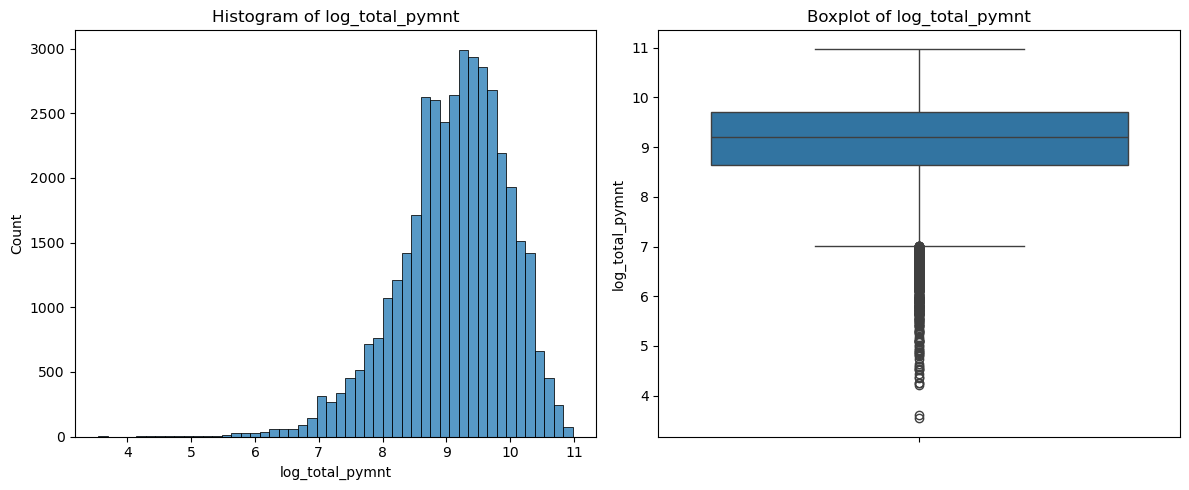

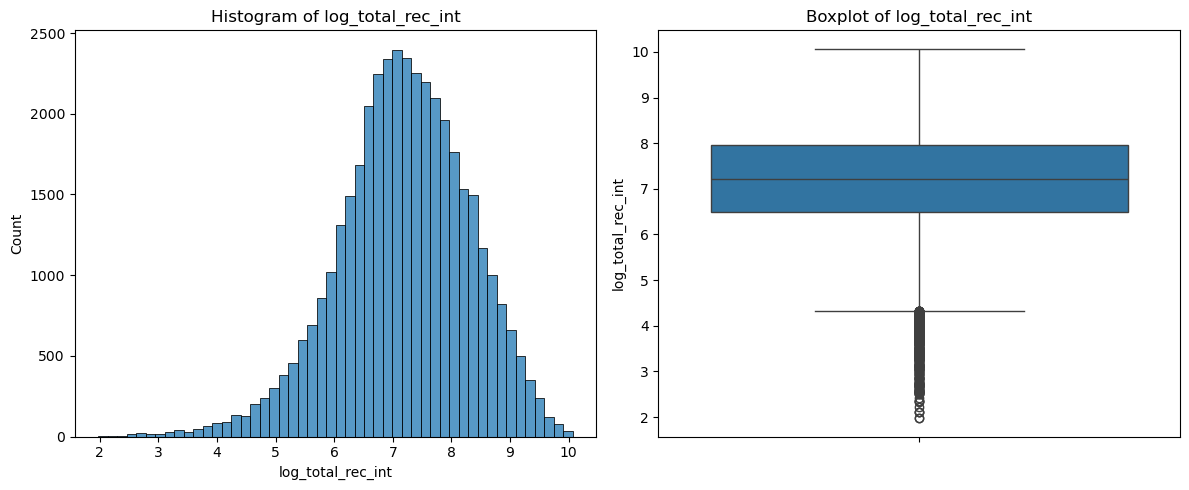

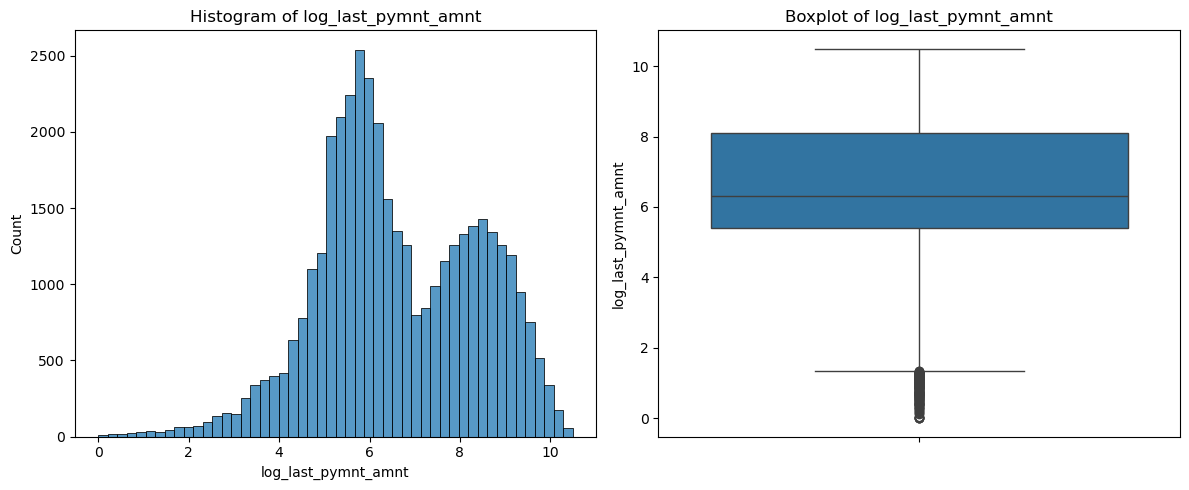

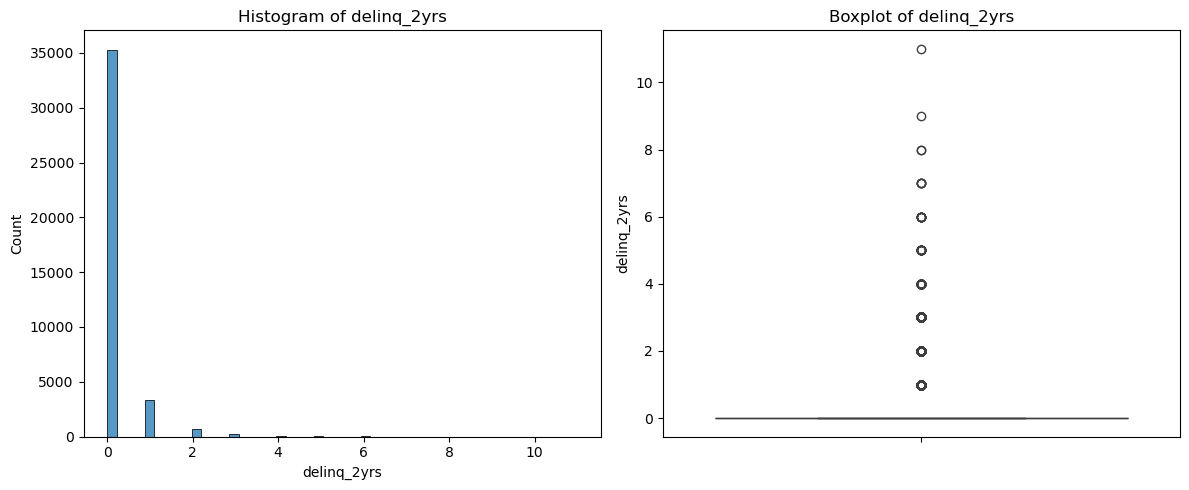

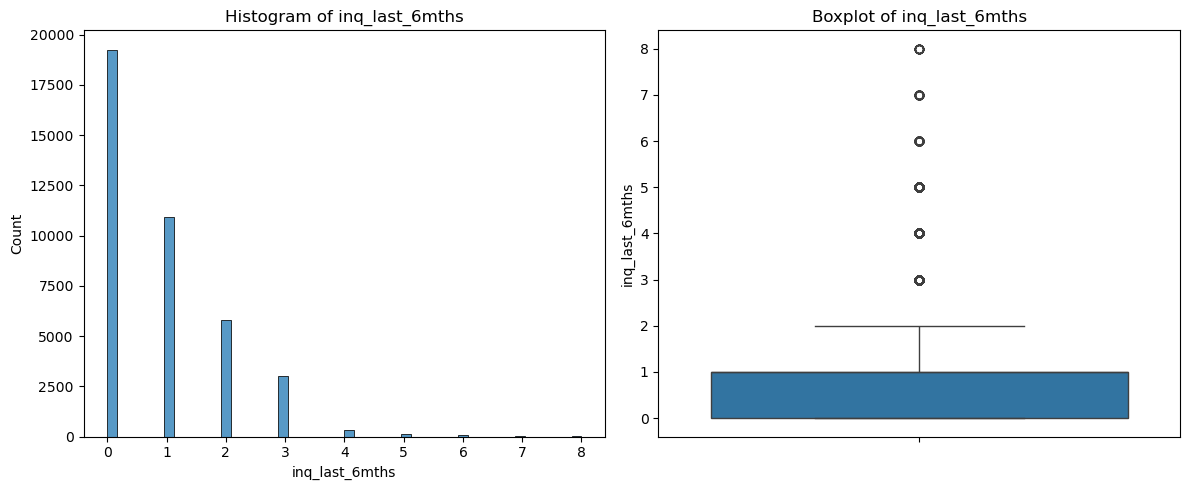

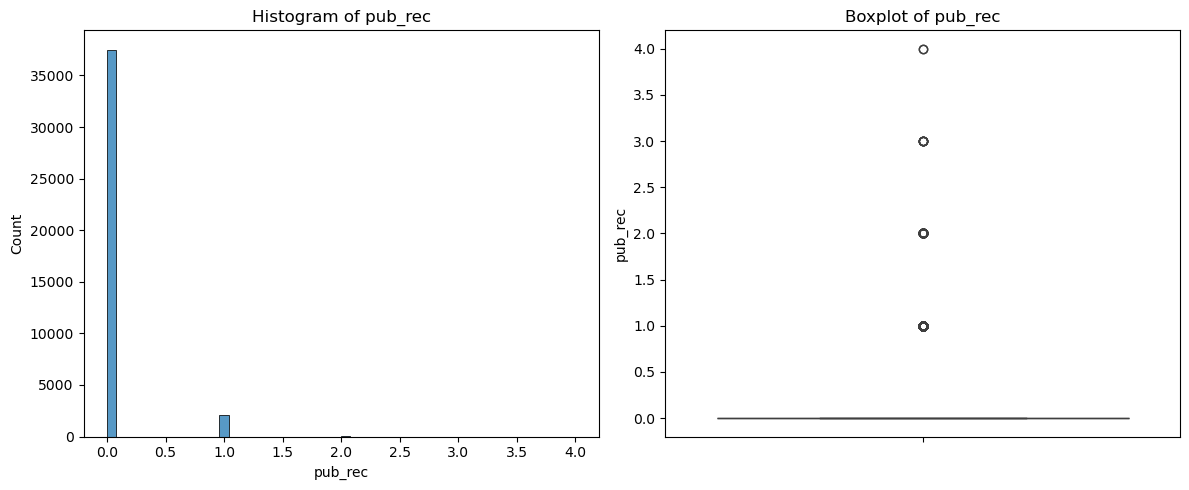

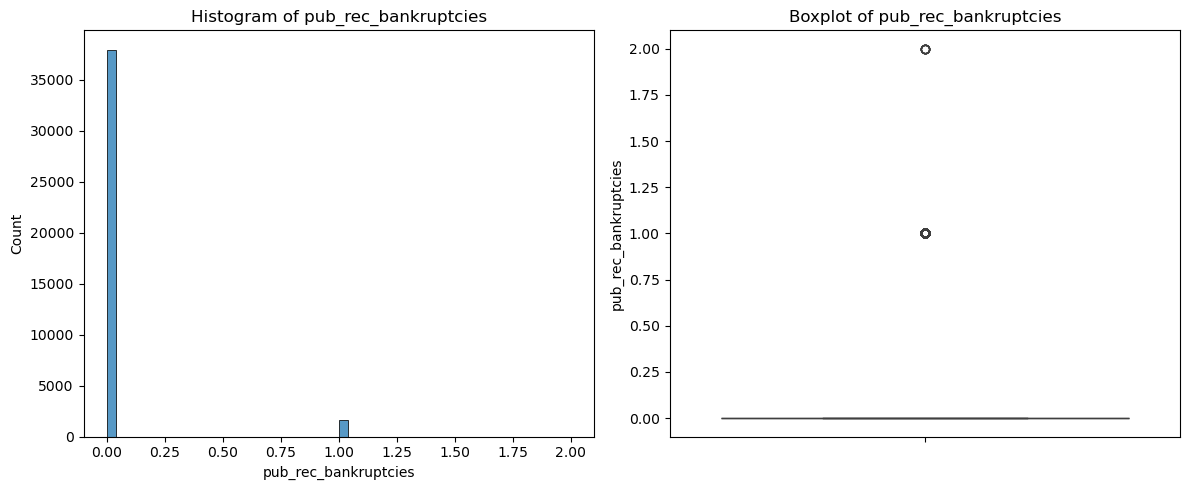

In [1960]:
for col in num_cols:
        # Create a figure with 2 subplots (1 row, 2 columns)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Plot histogram on the first subplot
    sns.histplot(x=loandf_cleaned[col], bins=50, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    # Plot boxplot on the second subplot
    sns.boxplot(y=loandf_cleaned[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    # Show the combined plots
    plt.tight_layout()  # Adjusts the spacing between plots
    plt.show()

#### loan_amt: 
##### plot is right skewed, also there are outliars on the highr side: This means most of the loans are of lower value. 
##### However there are few very high value loans. This certainly indicates increased risk


#### int_rate, installment
##### is also right skewed and outliars on top.

#### annual_income - is log transformed due to the high range. Seems to be normally distributed. but has outliars both below and above.

#### dti:
##### Has normal distribution with no outliars

#### open_acct:
##### Has rightskewed distribution with outliars at top

#### revol_bal
##### After log transform, is left skewed and has outliars on the bottom

### Segment Univariate Analysis

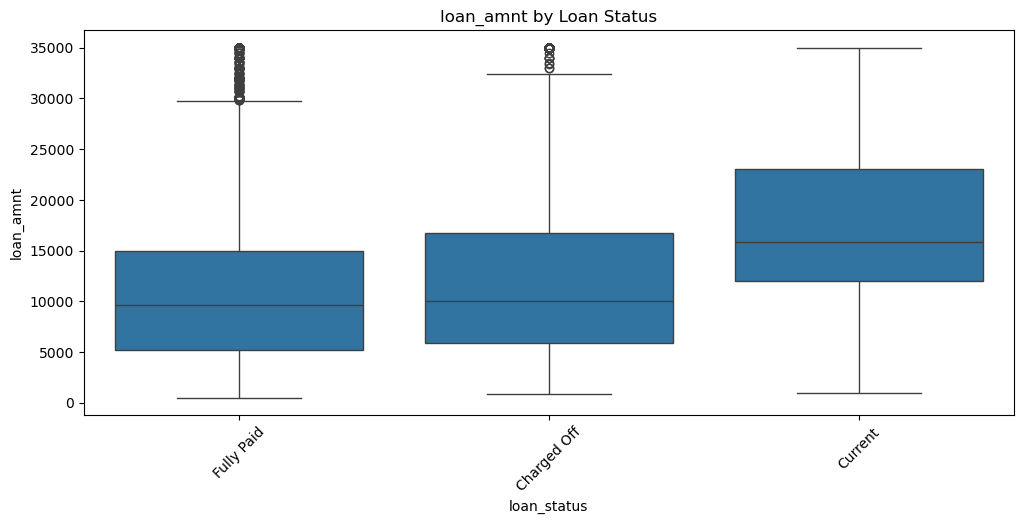

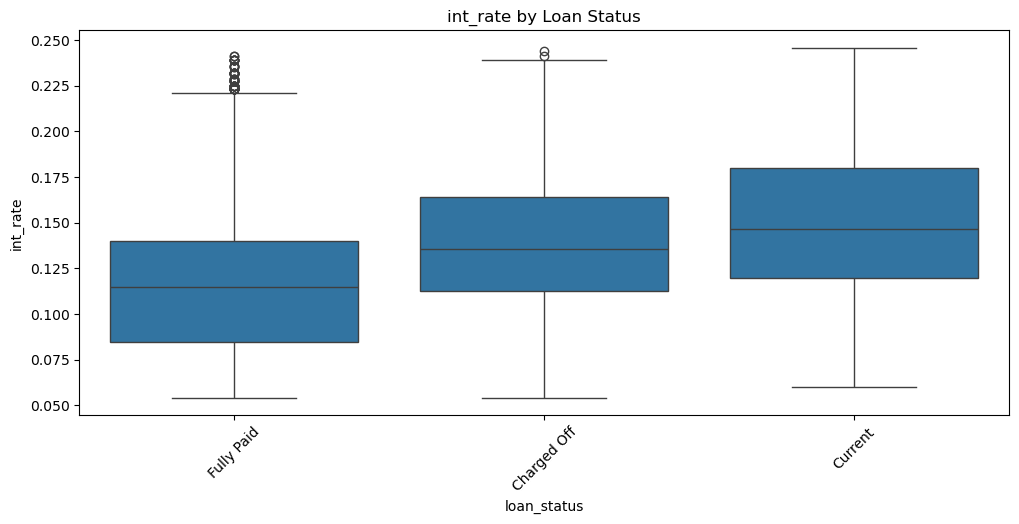

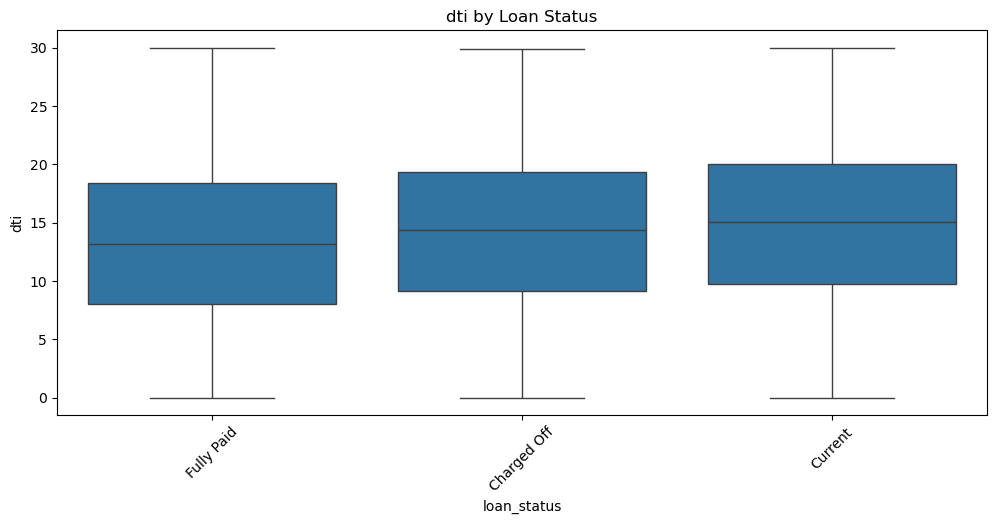

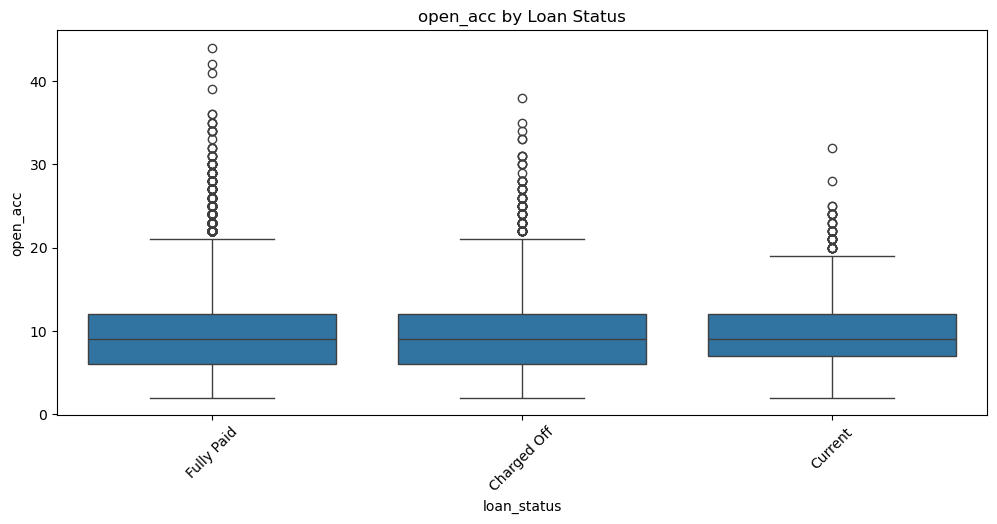

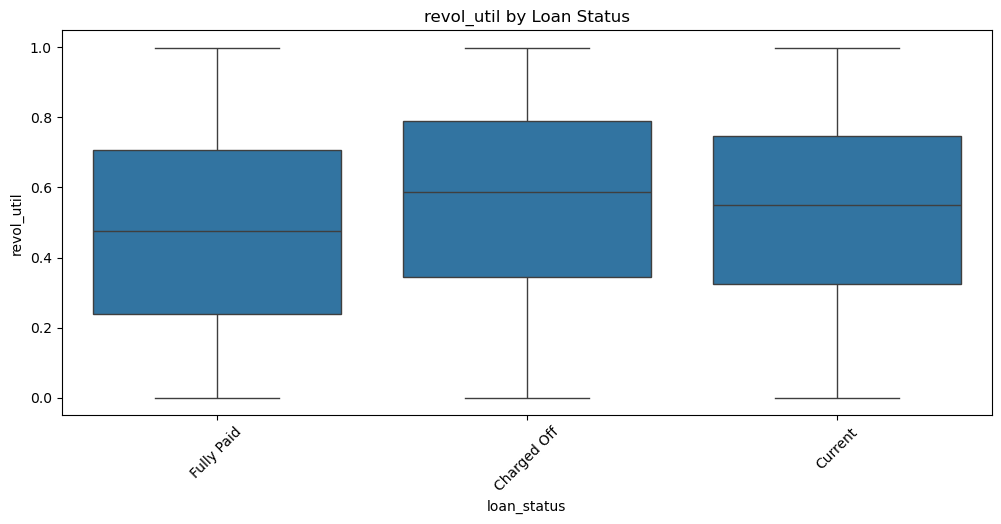

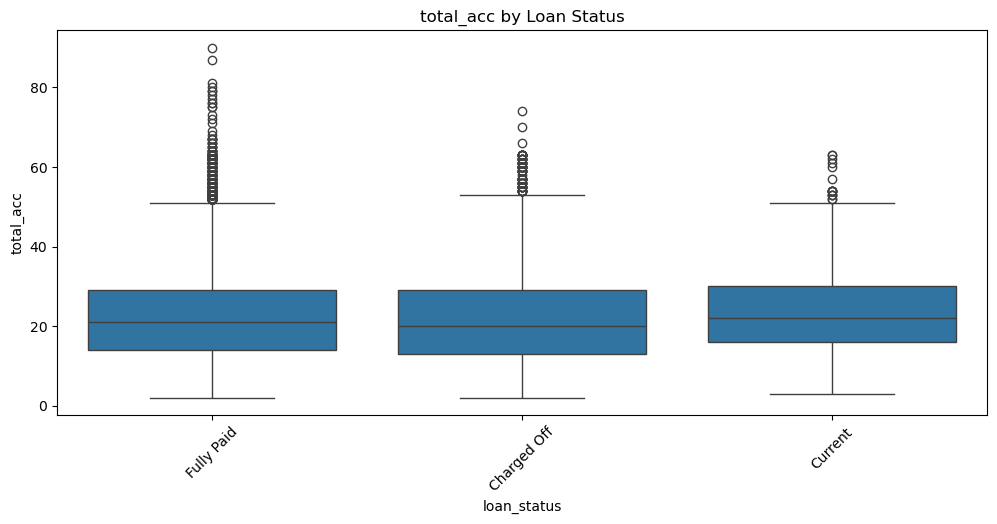

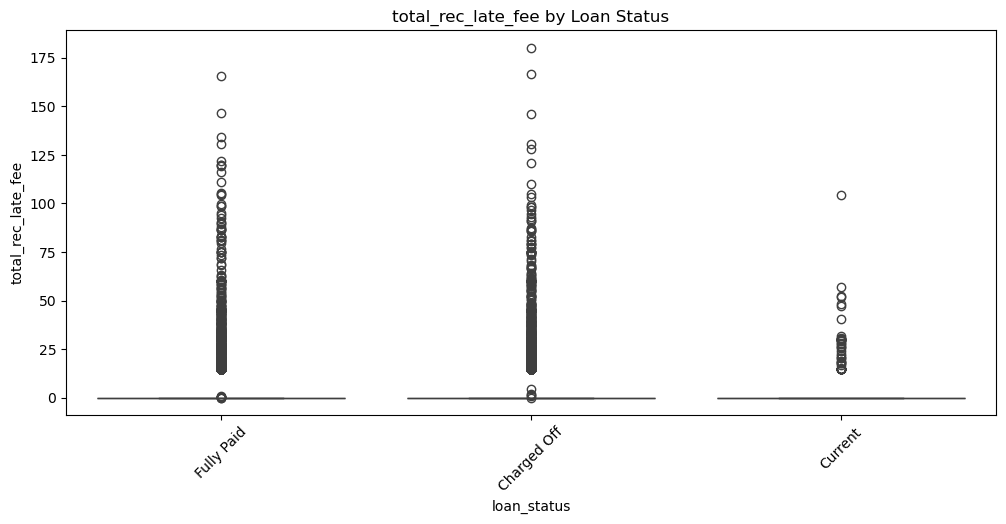

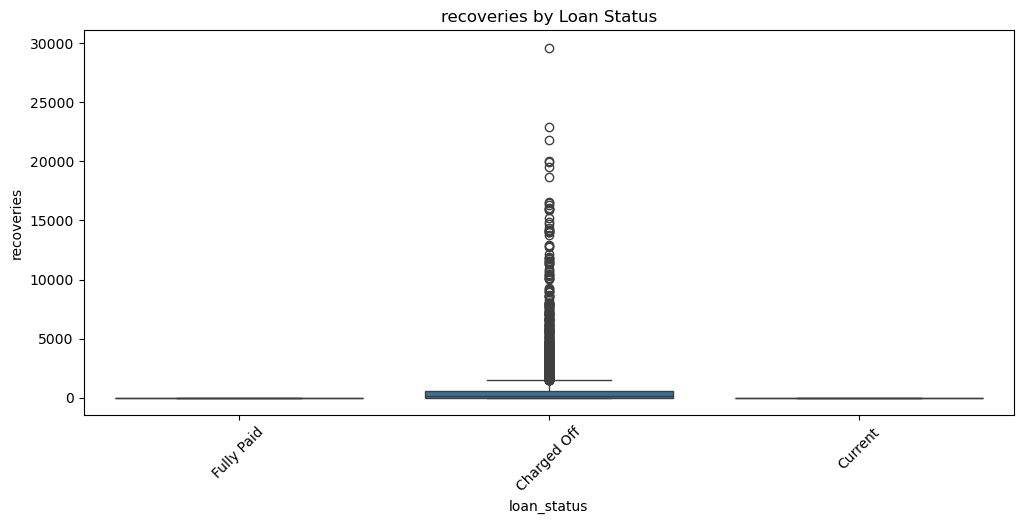

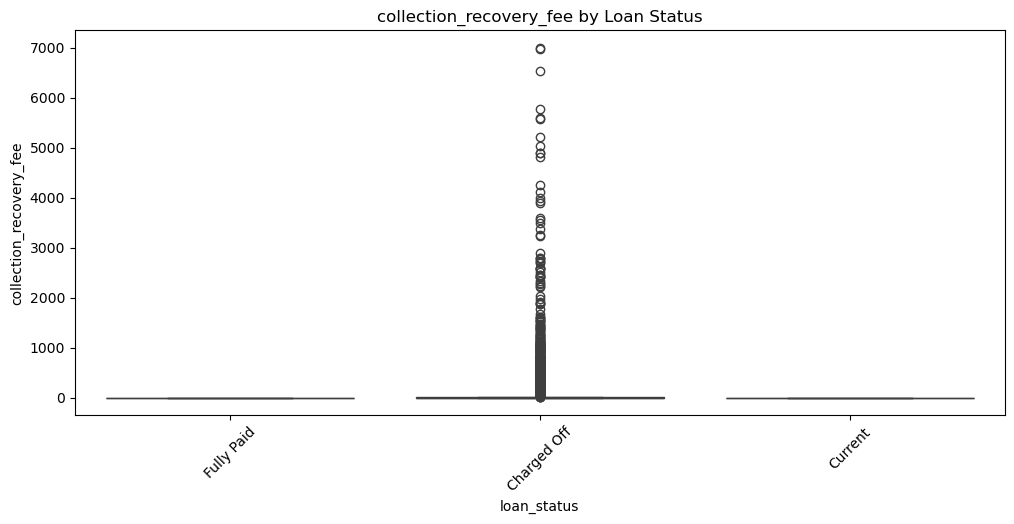

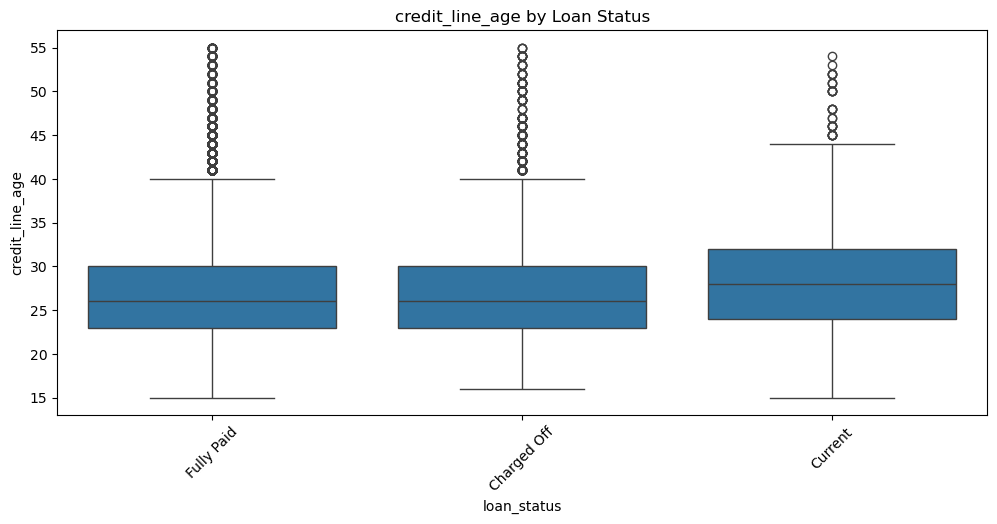

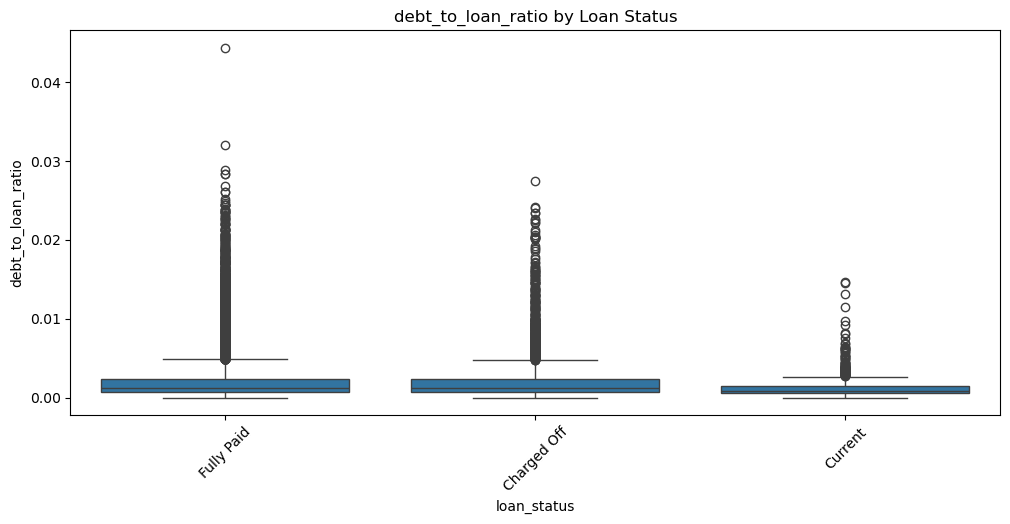

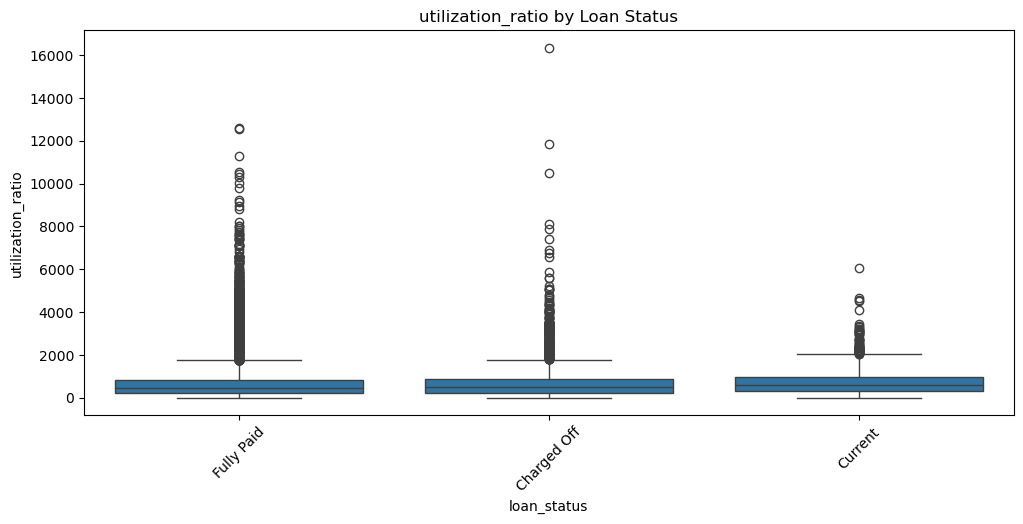

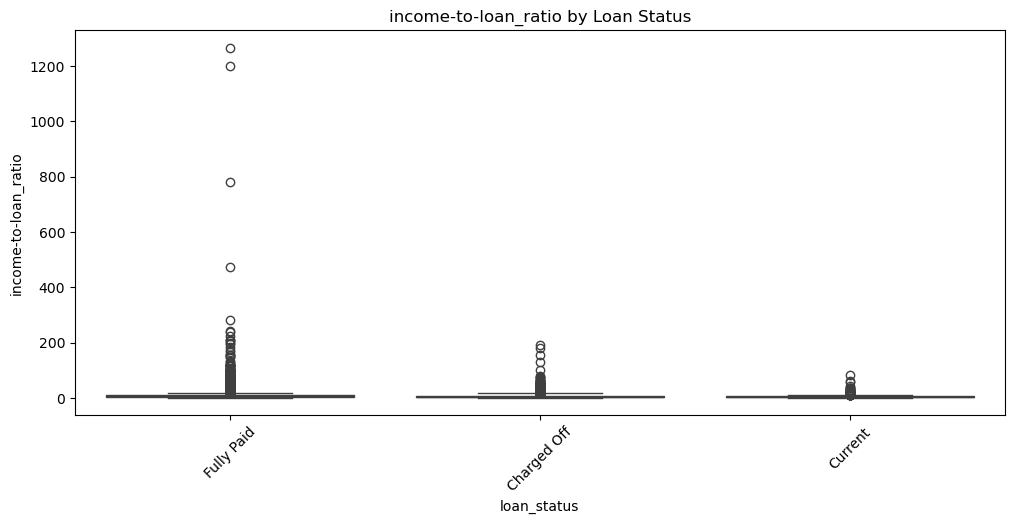

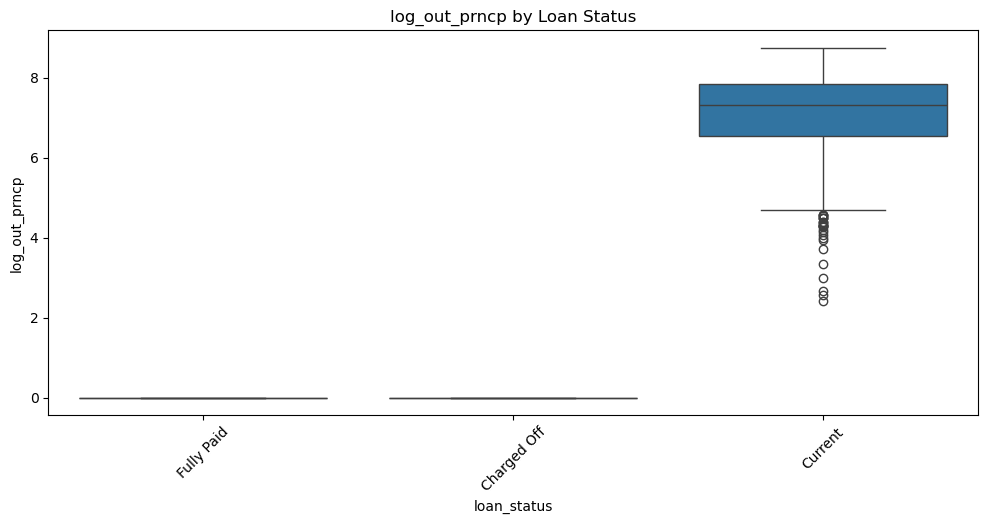

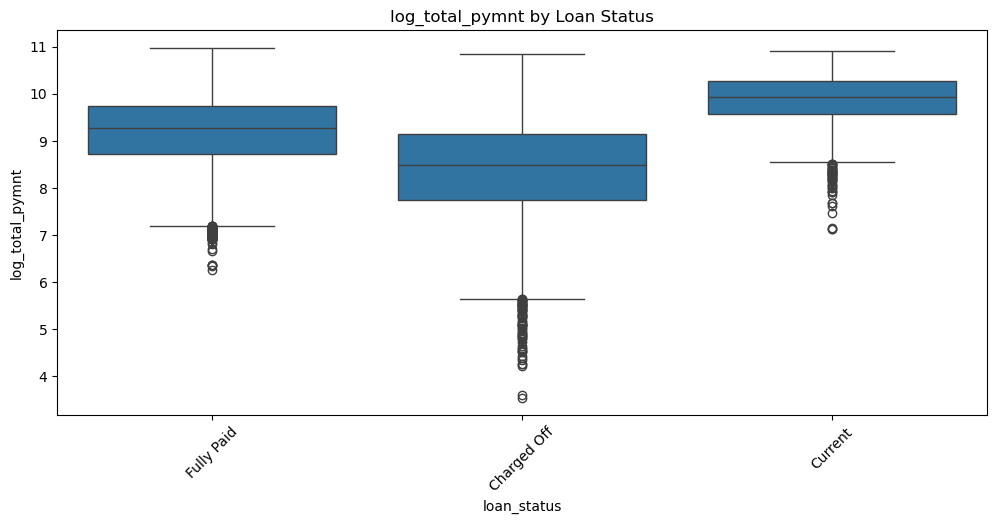

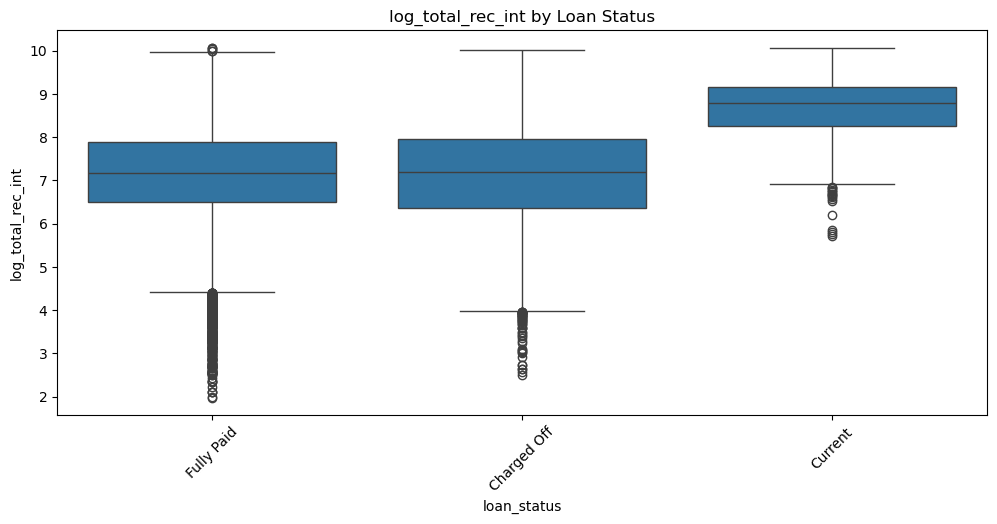

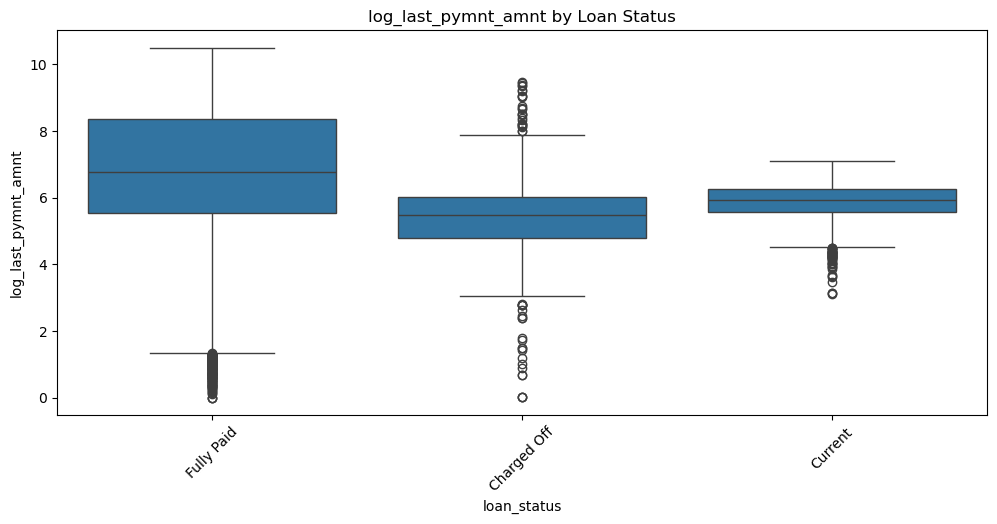

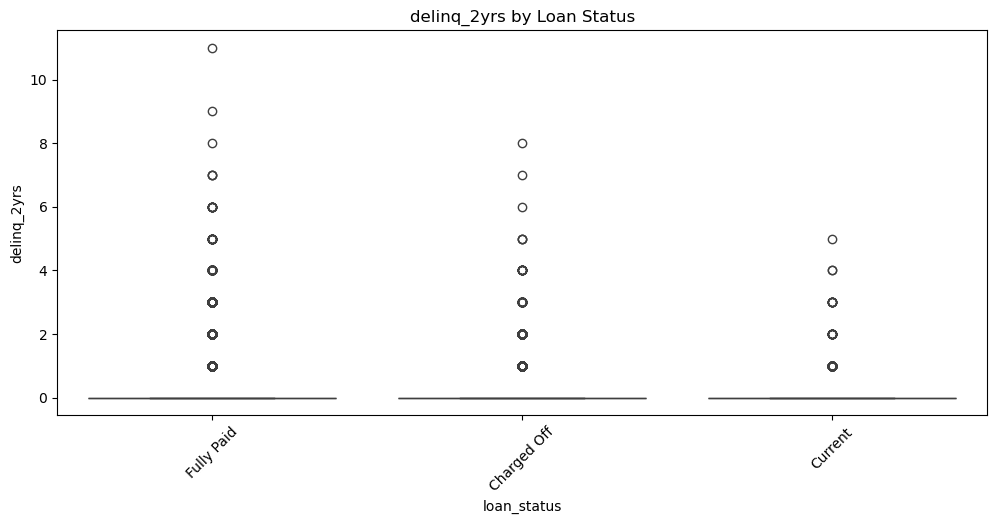

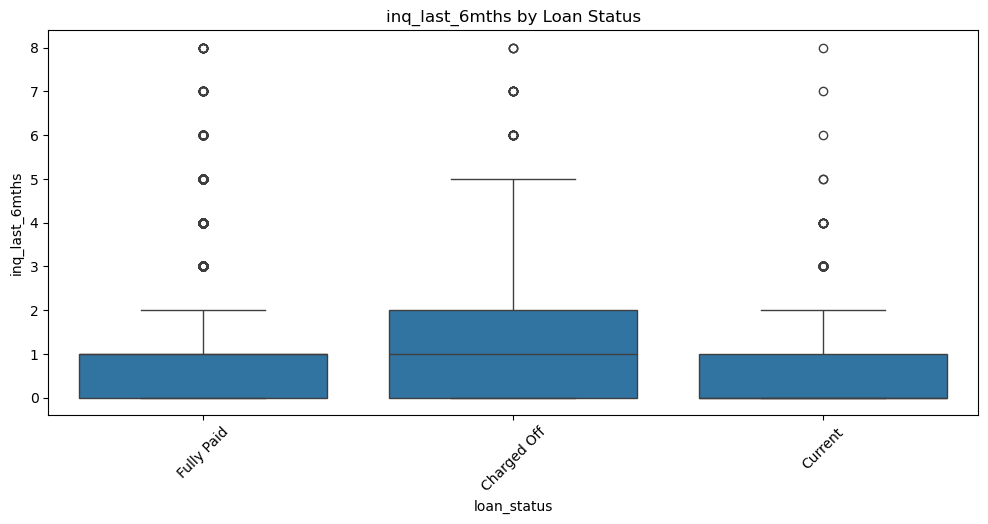

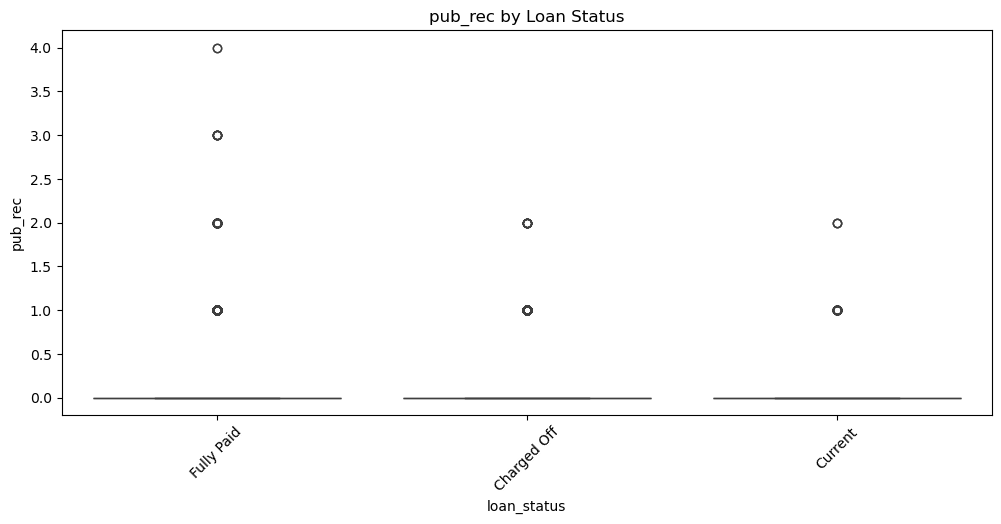

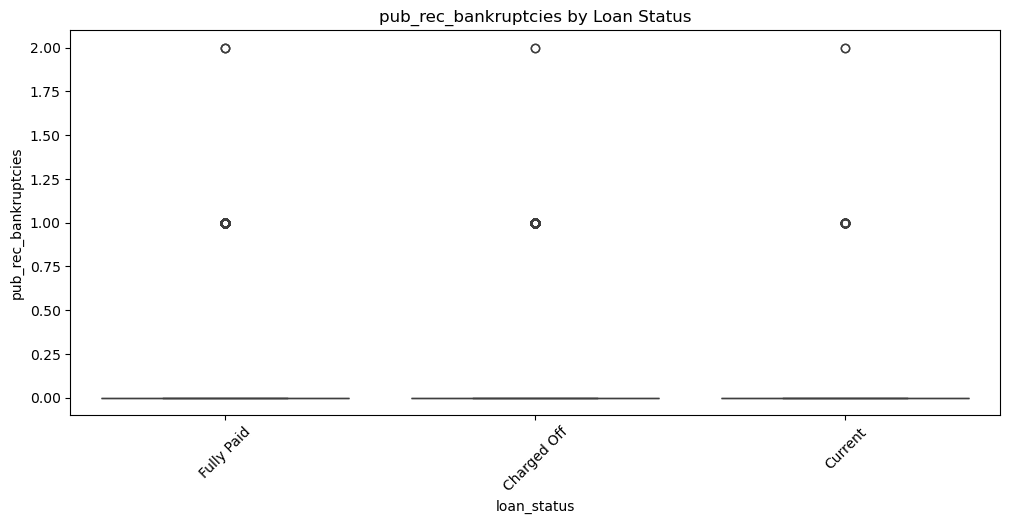

In [1969]:
for col in num_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='loan_status', y=loandf_cleaned[col], data=loandf_cleaned)
    plt.title(f'{col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

##### 1. loan_amnt, funded_amnt, funded_amnt_inv median and quratiles are slightly higher. The loans with current is more higher. This suggests there is a risk of defaults to increate.
##### 2.  Int_rate is also higher for defaults. Lokking at the box plot of current loans, seems the current loans are are at risk

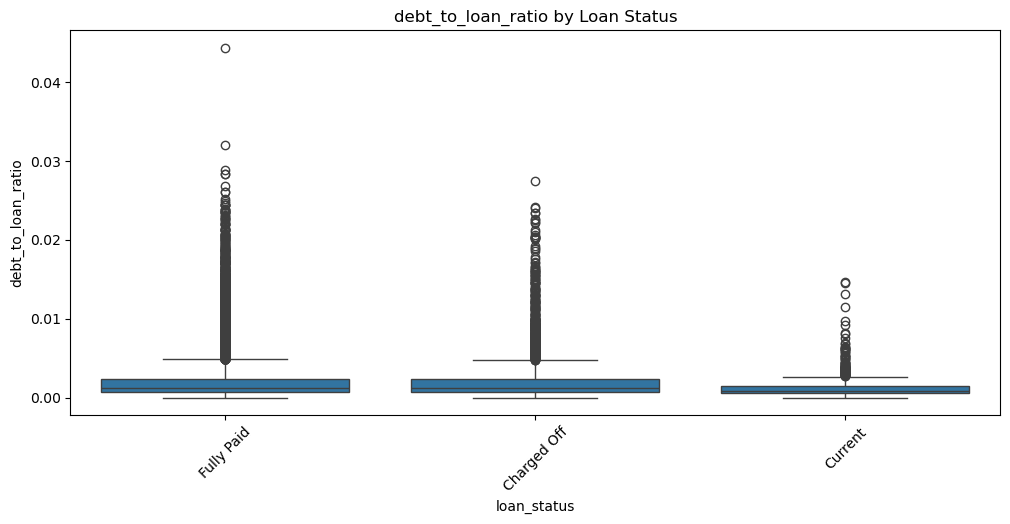

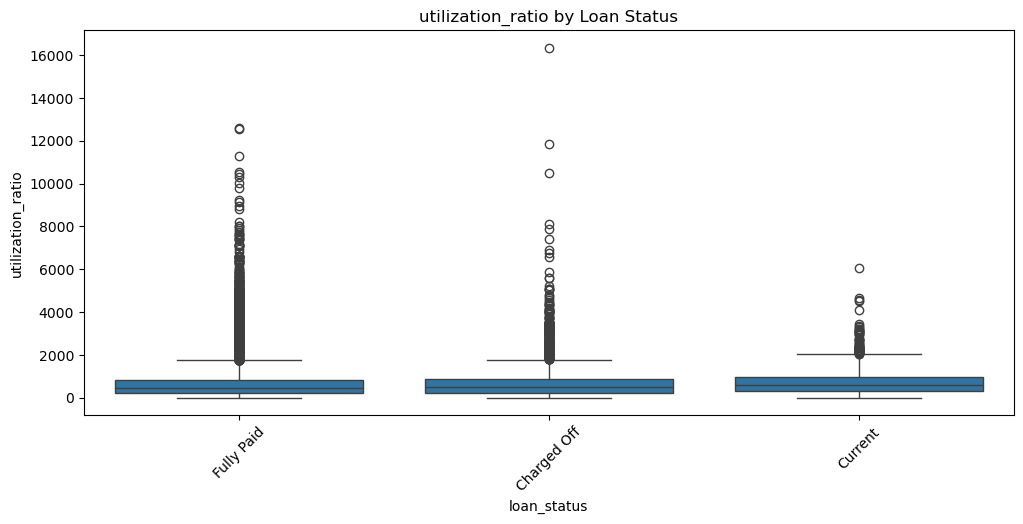

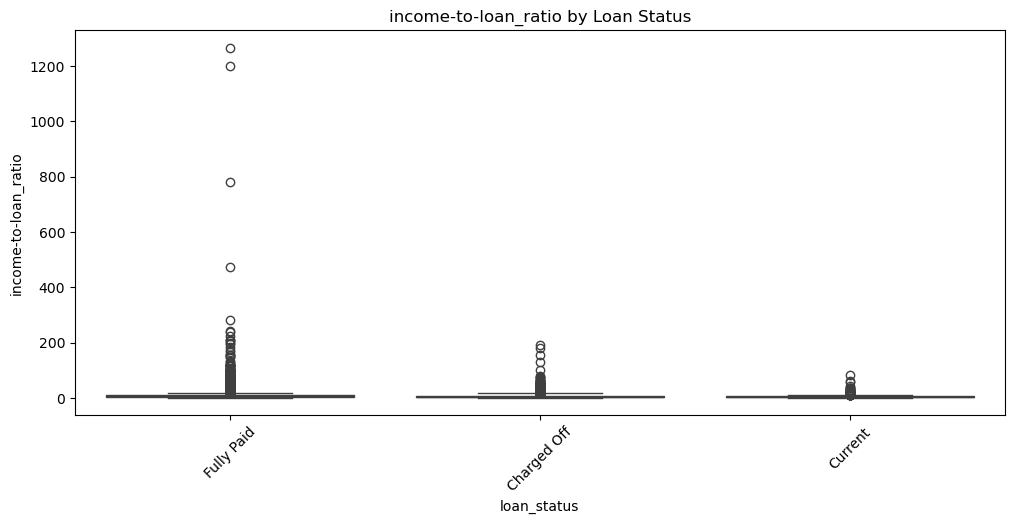

In [1971]:
for col in derived_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='loan_status', y=loandf_cleaned[col], data=loandf_cleaned)
    plt.title(f'{col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

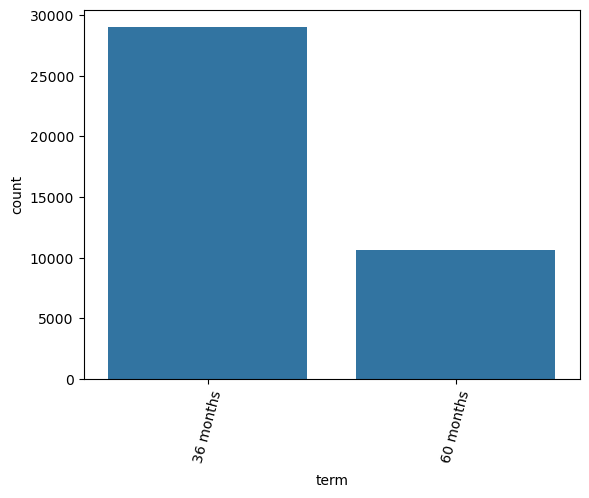

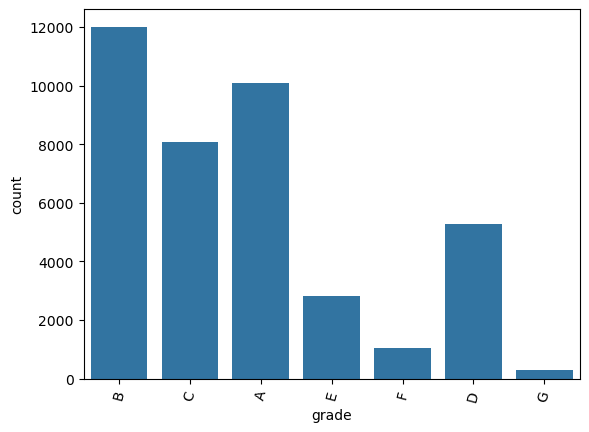

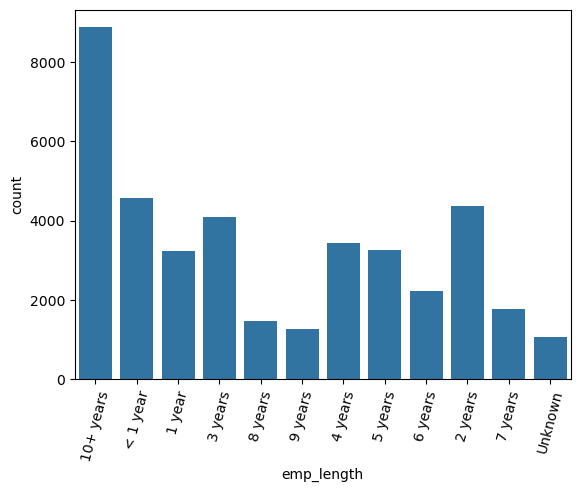

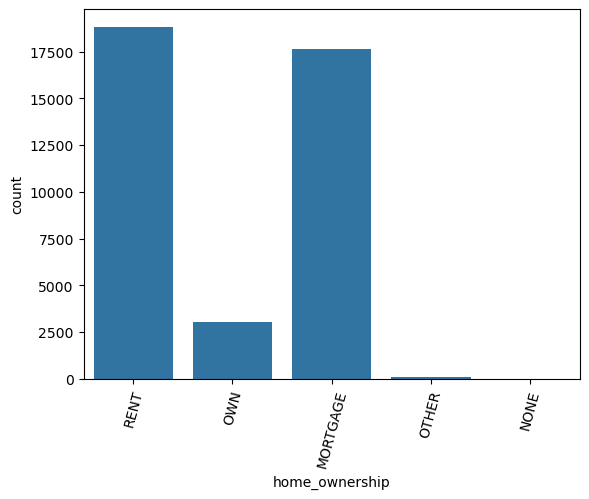

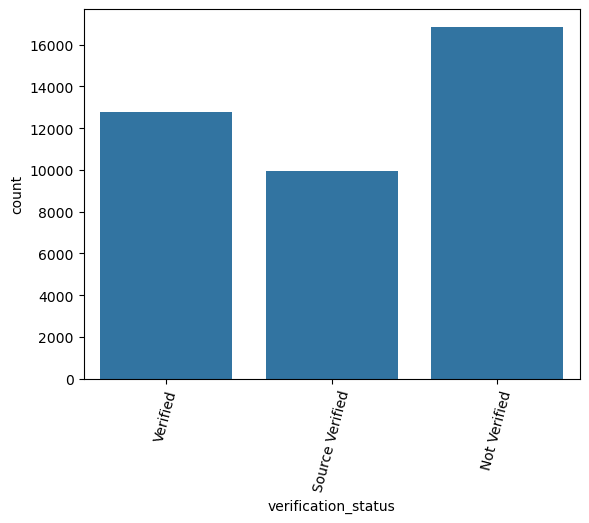

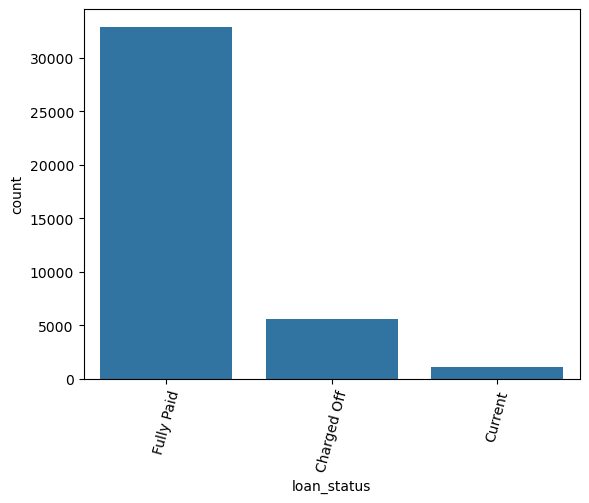

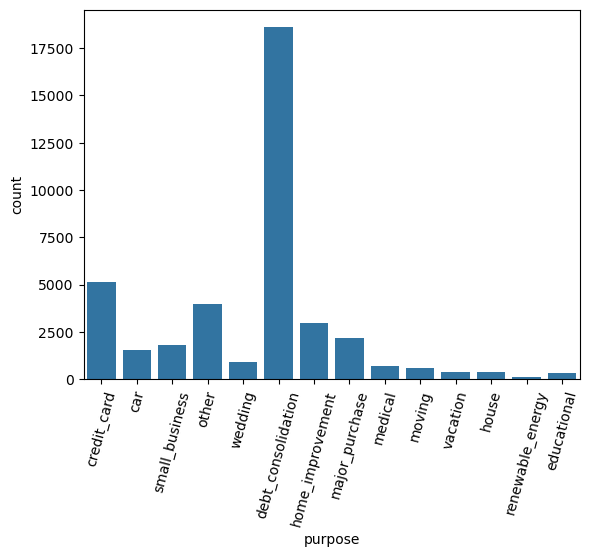

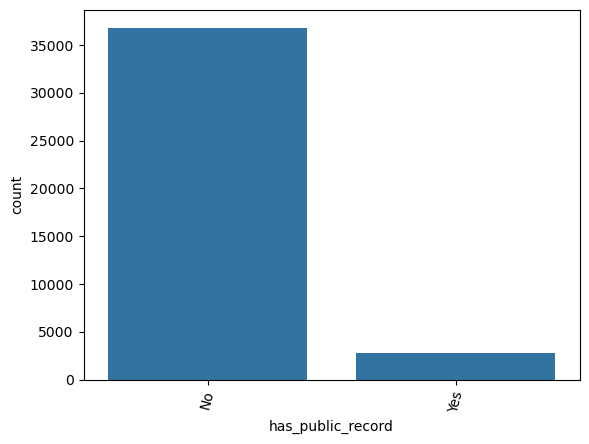

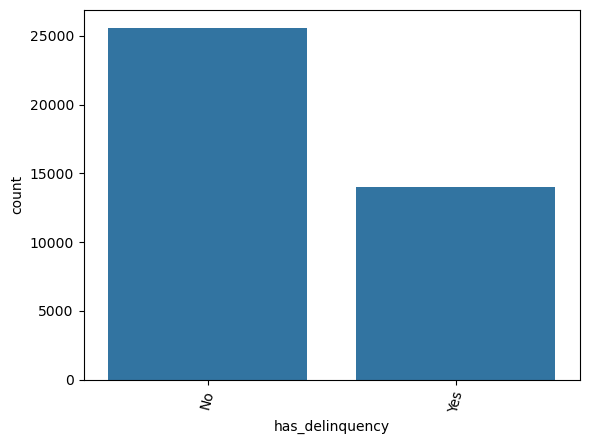

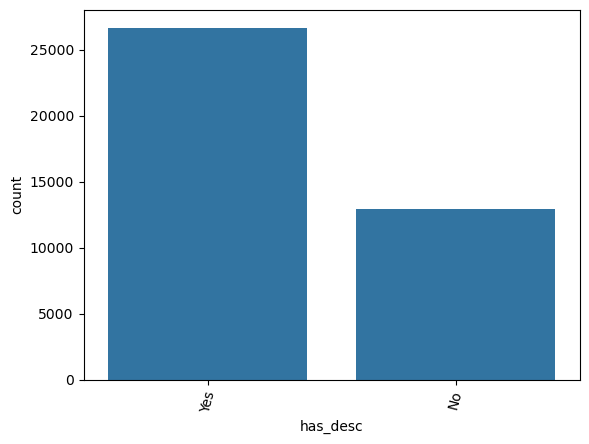

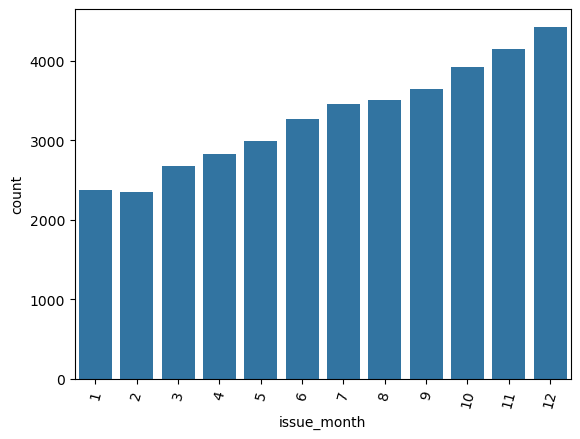

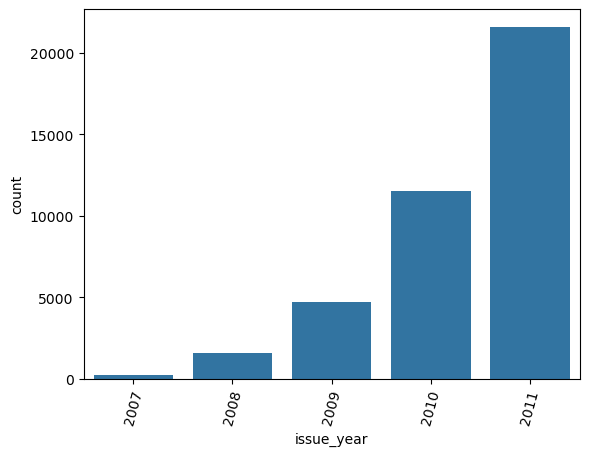

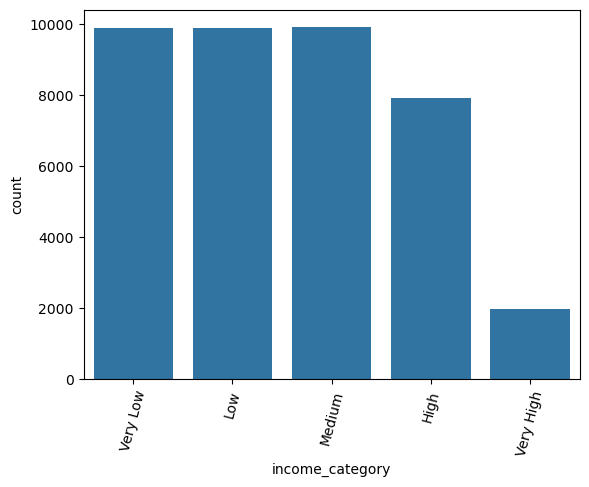

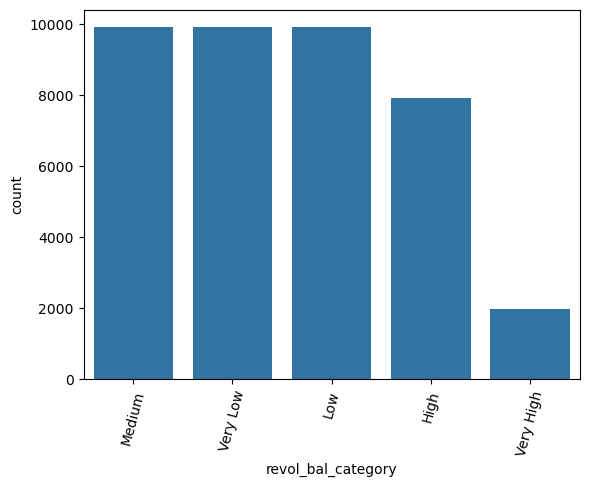

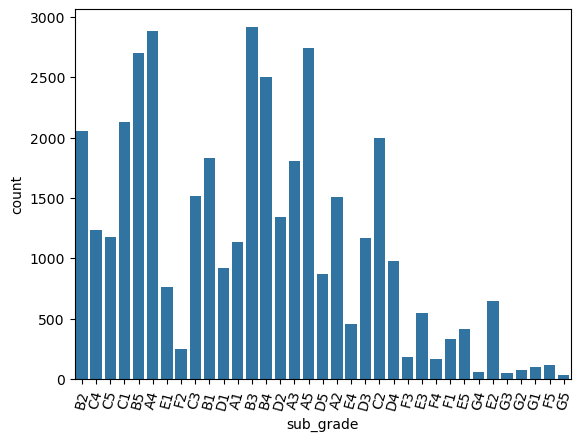

C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


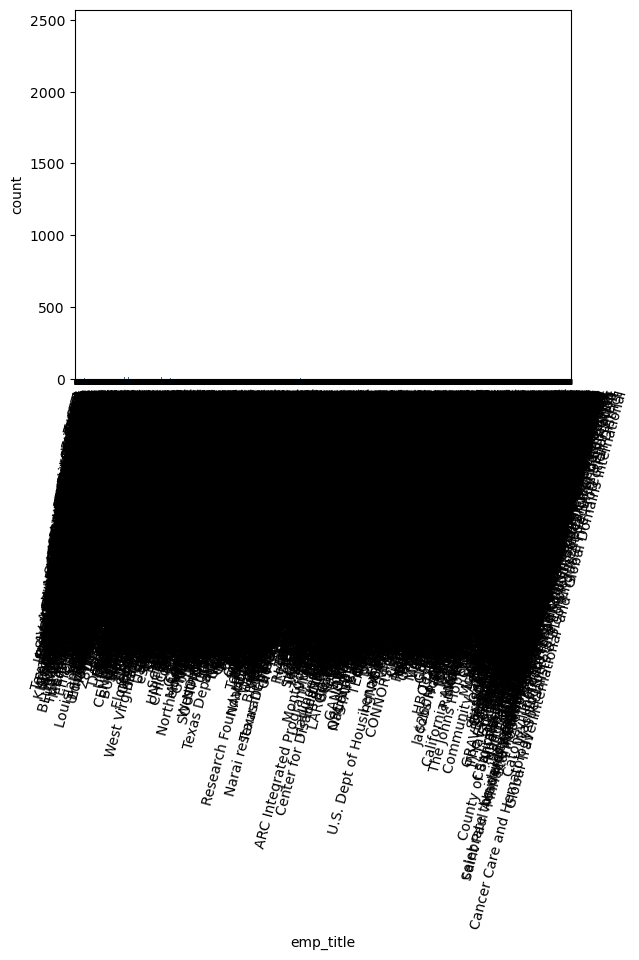

C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

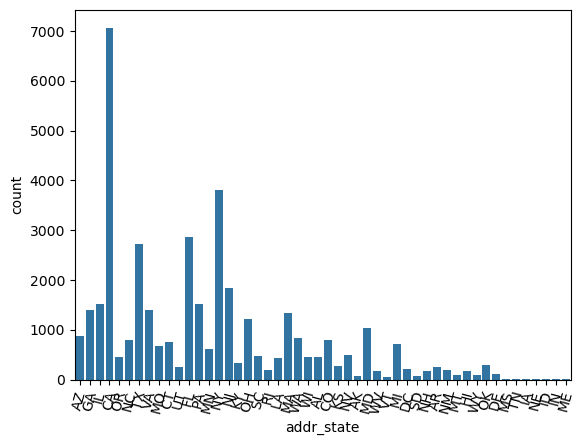

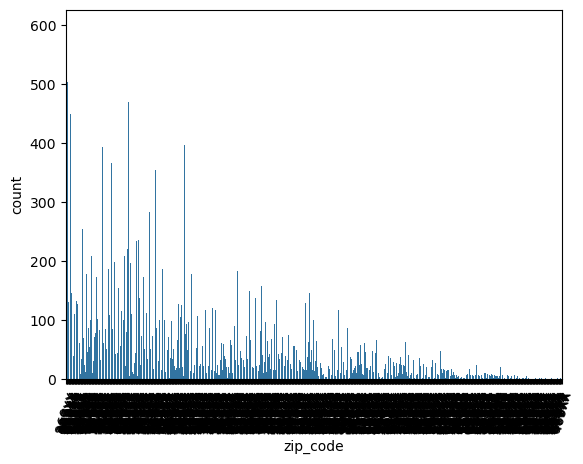

In [1972]:
for col in cat_cols:
    sns.countplot(x=loandf_cleaned[col])
    plt.xticks(rotation=75)
    plt.show()

### Univariate Analysis observtions and Corrective actions

## Bivariate Analysis

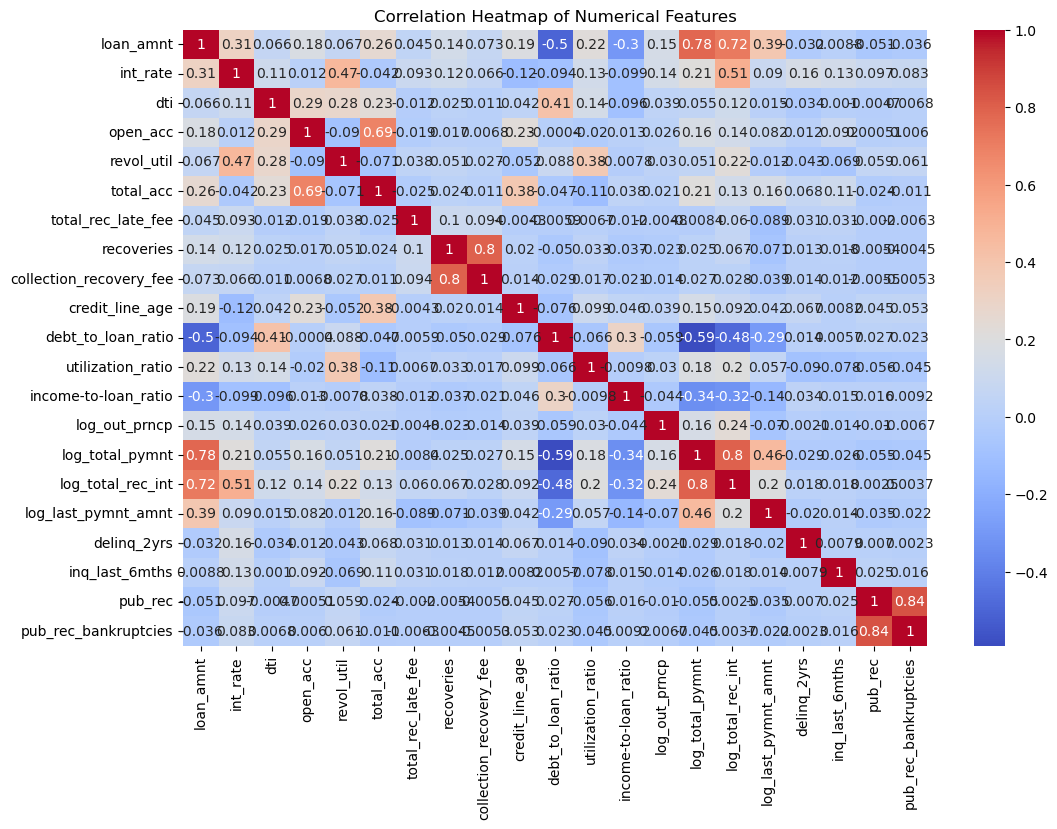

In [1975]:
corr = loandf_cleaned[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

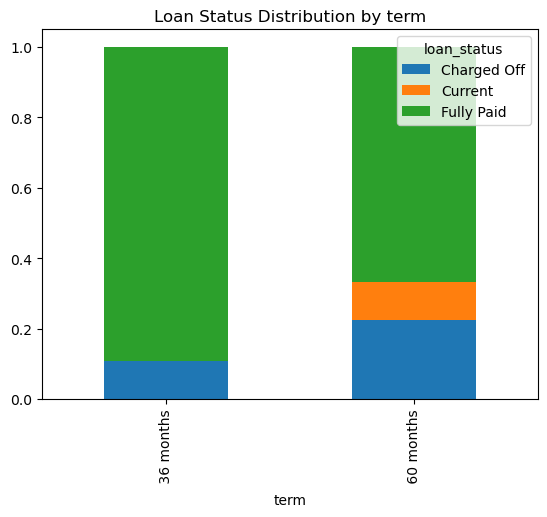

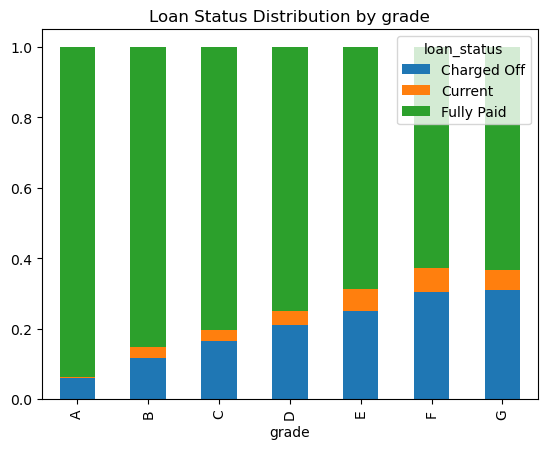

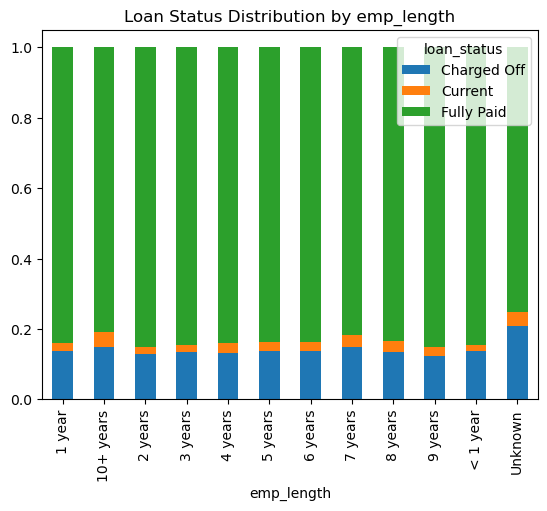

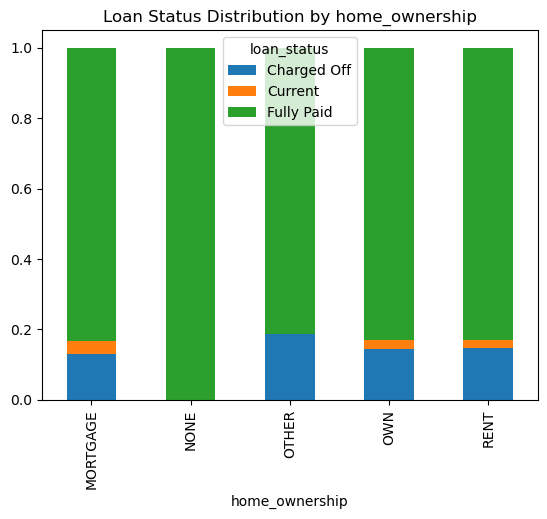

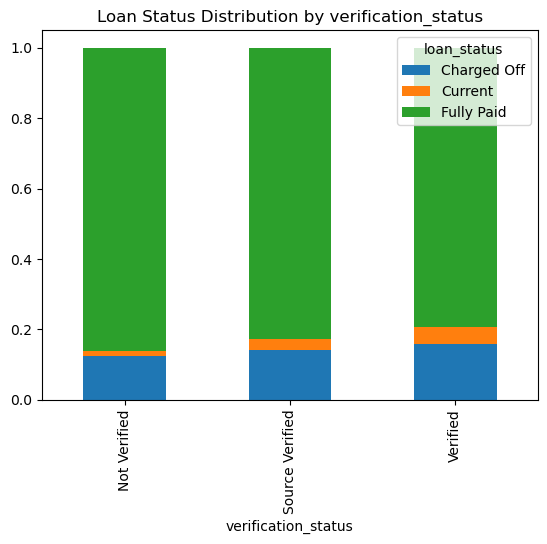

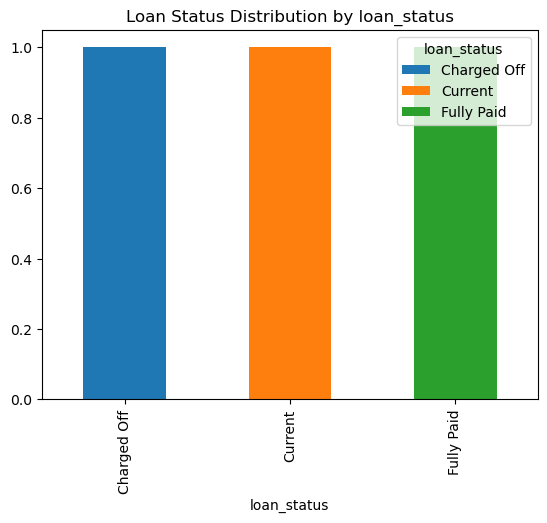

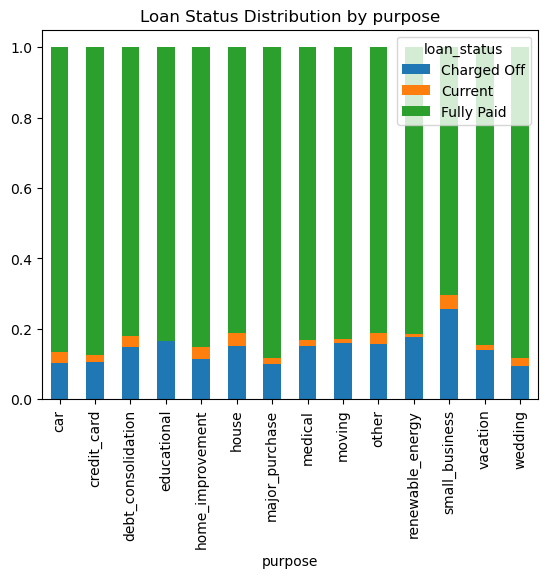

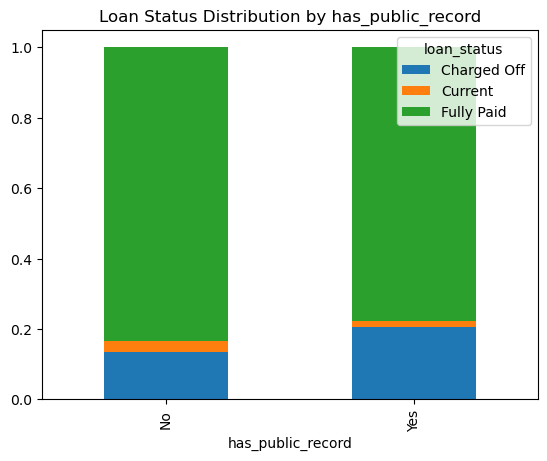

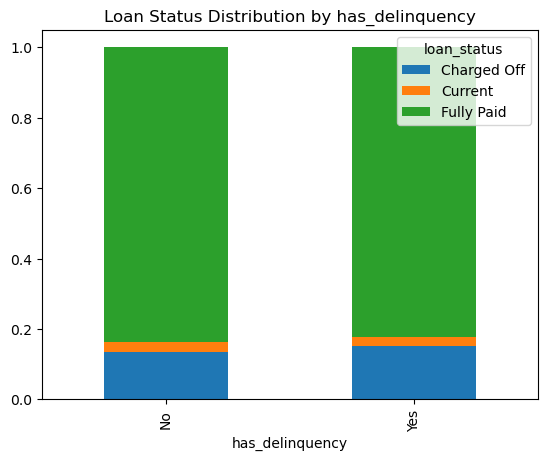

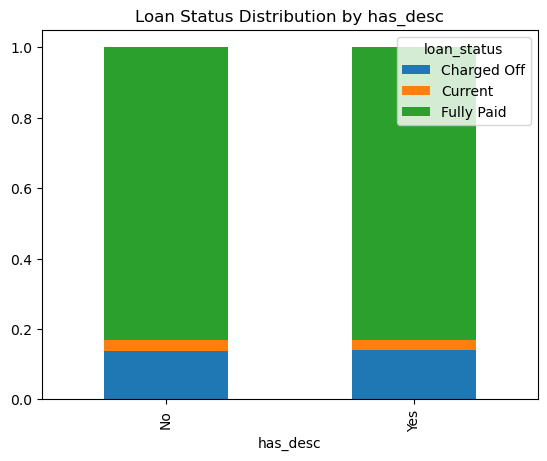

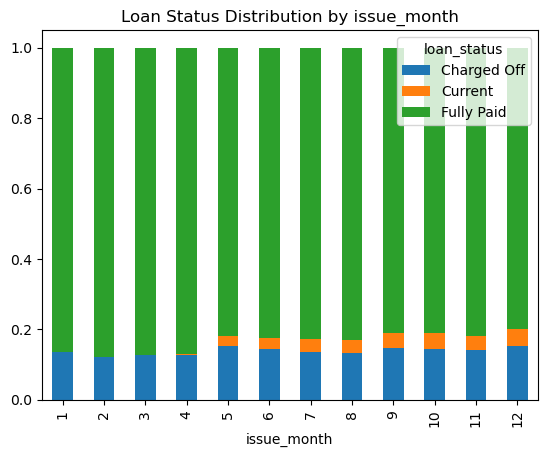

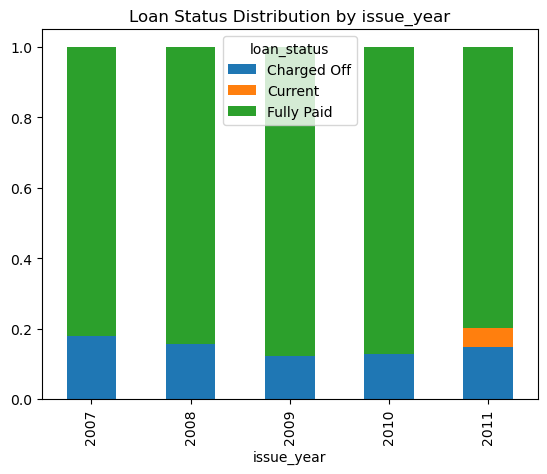

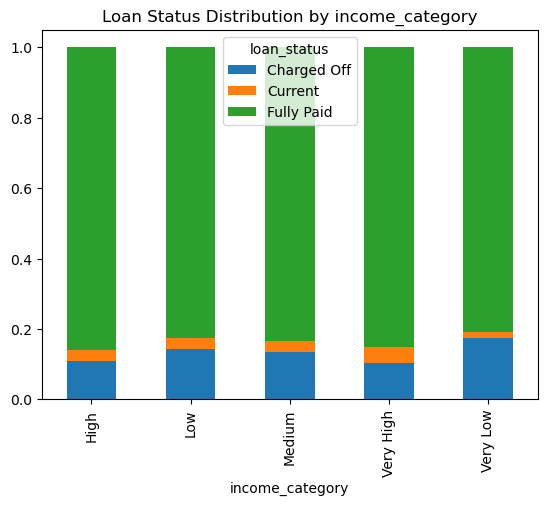

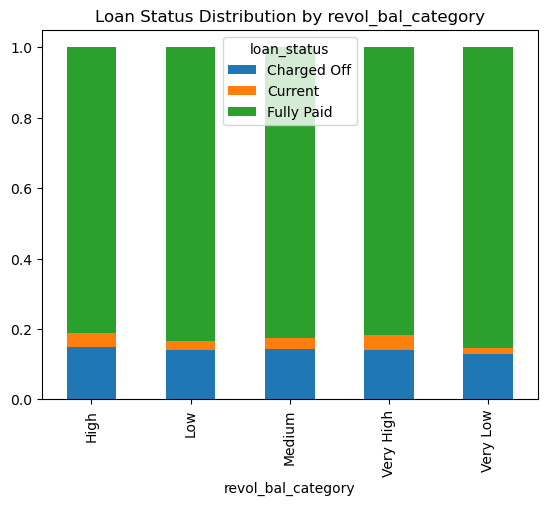

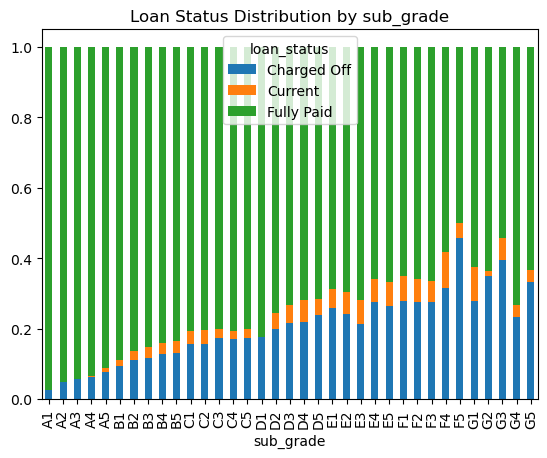

C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
for col in cat_cols:
    pd.crosstab(loandf_cleaned[col], loandf_cleaned['loan_status'], normalize='index').plot(kind='bar', stacked=True)
    plt.title('Loan Status Distribution by ' + col)
    plt.show()